In [34]:
library(ggplot2)
library(dplyr)
library(ggrepel)
library(purrr)
library(readr)

In [35]:
Ath_TF_list <- read.csv('./scan_motif/Ath_TF_list.txt', sep = '\t') %>% select(Gene_ID, Family) %>% distinct

In [36]:
Ath_TF_list

Gene_ID   Family     
1    AT3G25730 RAV        
2    AT1G68840 RAV        
3    AT1G13260 RAV        
4    AT1G25560 RAV        
5    AT1G50680 RAV        
6    AT1G51120 RAV        
7    AT1G01010 NAC        
8    AT1G01260 bHLH       
9    AT1G01720 NAC        
10   AT1G02065 SBP        
11   AT1G02210 NAC        
12   AT1G02220 NAC        
13   AT1G02230 NAC        
14   AT1G02250 NAC        
15   AT1G02340 bHLH       
16   AT1G03040 bHLH       
17   AT1G03490 NAC        
18   AT1G03970 bZIP       
19   AT1G05710 bHLH       
20   AT1G05805 bHLH       
21   AT1G06070 bZIP       
22   AT1G06170 bHLH       
23   AT1G06280 LBD        
24   AT1G06850 bZIP       
25   AT1G07520 GRAS       
26   AT1G07530 GRAS       
27   AT1G07640 Dof        
28   AT1G07900 LBD        
29   AT1G07980 NF-YC      
30   AT1G08000 GATA       
⋮    ⋮         ⋮          
1697 AT3G10590 MYB_related
1698 AT3G16350 MYB_related
1699 AT3G21430 MYB_related
1700 AT3G23250 MYB_related
1701 AT3G46130 MYB_related
1702 AT3G49850 MYB_related
1703 AT3G53790 MYB_related
1704 AT3G57980 MYB_related
1705 AT3G60110 MYB_related
1706 AT4G01060 MYB_related
1707 AT4G01280 MYB_related
1708 AT4G09450 MYB_related
1709 AT4G36570 MYB_related
1710 AT4G39160 MYB_related
1711 AT4G39250 MYB_related
1712 AT5G02840 MYB_related
1713 AT5G17300 MYB_related
1714 AT5G37260 MYB_related
1715 AT5G41020 MYB_related
1716 AT5G45420 MYB_related
1717 AT5G47390 MYB_related
1718 AT5G52660 MYB_related
1719 AT5G53200 MYB_related
1720 AT5G56840 MYB_related
1721 AT5G58340 MYB_related
1722 AT5G58900 MYB_related
1723 AT5G59780 MYB_related
1724 AT5G61420 MYB_related
1725 AT5G61620 MYB_related
1726 AT5G67580 MYB_related

In [37]:
Ath_TF_list_duplicated <- Ath_TF_list %>% filter( Gene_ID %in% 
        (Ath_TF_list %>% group_by(Gene_ID) %>% summarize(n = n()) %>% arrange(desc(n)) %>% filter(n > 1)  %>% pull(Gene_ID))
                       ) %>% arrange(Gene_ID)
Ath_TF_list_duplicated

Gene_ID   Family     
1  AT1G08810 MYB        
2  AT1G08810 MYB_related
3  AT2G24790 DBB        
4  AT2G24790 CO-like    
5  AT2G47890 DBB        
6  AT2G47890 CO-like    
7  AT3G23250 MYB        
8  AT3G23250 MYB_related
9  AT3G46130 MYB        
10 AT3G46130 MYB_related
11 AT3G54320 AP2        
12 AT3G54320 ERF        
13 AT5G15840 DBB        
14 AT5G15840 CO-like    
15 AT5G59780 MYB        
16 AT5G59780 MYB_related
17 AT5G61420 MYB        
18 AT5G61420 MYB_related

In [38]:
Ath_TF_list <- Ath_TF_list %>% filter( ! Gene_ID %in% Ath_TF_list_duplicated$Gene_ID)  %>% rbind(Ath_TF_list_duplicated %>% filter(!Family %in% c('MYB_related', 'CO-like', 'AP2')))

In [39]:
source('../gene_table_and_other_scripts/theme_Publication.R')

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont().

Georgia already regist

In [40]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id   gene_name
1 AT5G39540 AT5G39540
2 AT3G49350 AT3G49350

In [41]:
diffTF_result <- read.csv(
    '/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.summary.tsv',
    sep = '\t') %>% arrange(pvalueAdj) %>% left_join(map_id_name, by = c('TF' = 'gene_id'))

In [42]:
diffTF_result 

TF        weighted_meanDifference weighted_CD TFBS  weighted_Tstat variance
1   AT1G01250 -0.02740                0.0940       6948 NaN            NA      
2   AT1G01260 -0.20600                0.6140       4338 NaN            NA      
3   AT1G01720  0.03200                0.0740       5237 NaN            NA      
4   AT1G02230  0.08120                0.2290       8667 NaN            NA      
5   AT1G02250  0.07810                0.2150      10067 NaN            NA      
6   AT1G03800 -0.03250                0.1210      10741 NaN            NA      
7   AT1G03840 -0.05000                0.1210      15463 NaN            NA      
8   AT1G06070  0.06120                0.1970       4843 NaN            NA      
9   AT1G06850  0.03870                0.1290       4813 NaN            NA      
10  AT1G08000  0.04410                0.1270       7684 NaN            NA      
11  AT1G08010  0.04030                0.1090       7328 NaN            NA      
12  AT1G08320  0.01850                0.0540       5444 NaN            NA      
13  AT1G09030  0.04220                0.1140       9758 NaN            NA      
14  AT1G09530 -0.13900                0.3930       7552 NaN            NA      
15  AT1G09770  0.06490                0.2120       2877 NaN            NA      
16  AT1G10120 -0.18300                0.5270       6098 NaN            NA      
17  AT1G12260  0.06820                0.1810       6951 NaN            NA      
18  AT1G12610  0.00625                0.0659       5172 NaN            NA      
19  AT1G12630 -0.05000                0.1670       7150 NaN            NA      
20  AT1G13260  0.02510                0.0910      15755 NaN            NA      
21  AT1G13300  0.04320                0.1190      10194 NaN            NA      
22  AT1G13450  0.03910                0.0973       7486 NaN            NA      
23  AT1G14580 -0.08970                0.2180      12870 NaN            NA      
24  AT1G16490  0.03310                0.1050      11175 NaN            NA      
25  AT1G18330 -0.02940                0.0676       9382 NaN            NA      
26  AT1G18570  0.03040                0.0906      11032 NaN            NA      
27  AT1G18960  0.04370                0.1330      18253 NaN            NA      
28  AT1G19000  0.01400                0.0463       9655 NaN            NA      
29  AT1G19040  0.07270                0.2000       9024 NaN            NA      
30  AT1G19210 -0.04080                0.1340       7659 NaN            NA      
⋮   ⋮         ⋮                       ⋮           ⋮     ⋮              ⋮       
584 AT1G35460  0.008560               0.0992       9663 NaN            NA      
585 AT3G57920 -0.006580               0.0505       4095 NaN            NA      
586 AT5G14960  0.002980               0.0481       9181 NaN            NA      
587 AT5G67580 -0.008170               0.0874       9377 NaN            NA      
588 AT1G06280 -0.011500               0.0512       5499 NaN            NA      
589 AT3G48430  0.004400               0.0321      12799 NaN            NA      
590 AT5G50570  0.005320               0.0147       4393 NaN            NA      
591 AT2G42280  0.007180               0.1050       9622 NaN            NA      
592 AT5G13790  0.004690               0.0397      11906 NaN            NA      
593 AT3G46070  0.007960               0.0367      14645 NaN            NA      
594 AT2G18350 -0.005810               0.0694       8917 NaN            NA      
595 AT1G71450 -0.004870               0.0440      14161 NaN            NA      
596 AT2G22300 -0.007430               0.0266       2251 NaN            NA      
597 AT2G36010 -0.004020               0.0357       3020 NaN            NA      
598 AT1G51140  0.005920               0.1120       9689 NaN            NA      
599 AT2G40220 -0.005800               0.0547       4102 NaN            NA      
600 AT1G33240  0.005360               0.0284       7928 NaN            NA      
601 AT5G25390  0.003970               0.0144      14178 NaN            NA      
602 

In [43]:
diffTF_result %>% filter(gene_name == 'VND1')

TF        weighted_meanDifference weighted_CD TFBS weighted_Tstat variance
1 AT2G18060 0.058                   0.154       6894 NaN            NA      
  pvalue     Cohend_factor pvalueAdj  median.cor.tfs classification_q0.1
1 0.00990099 2             0.01256585 -0.3893676     repressor          
  classification_q0.05 classification_q0.01 classification_q0.001
1 repressor            repressor            repressor            
  classification_distr_rawP classification_q0.1_final
1 8.640521e-78              repressor                
  classification_q0.05_final classification_q0.01_final
1 repressor                  repressor                 
  classification_q0.001_final gene_name
1 repressor                   VND1

In [44]:
diffTF_result %>% group_by(classification_q0.001_final) %>% summarise(n = n())

classification_q0.001_final n  
1 activator                   121
2 not-expressed                67
3 repressor                    51
4 undetermined                374

In [45]:
diffTF_result %>% group_by(classification_q0.001_final) %>% summarise(n = n())

classification_q0.001_final n  
1 activator                   121
2 not-expressed                67
3 repressor                    51
4 undetermined                374

In [46]:
#COLvsDM means COL is base

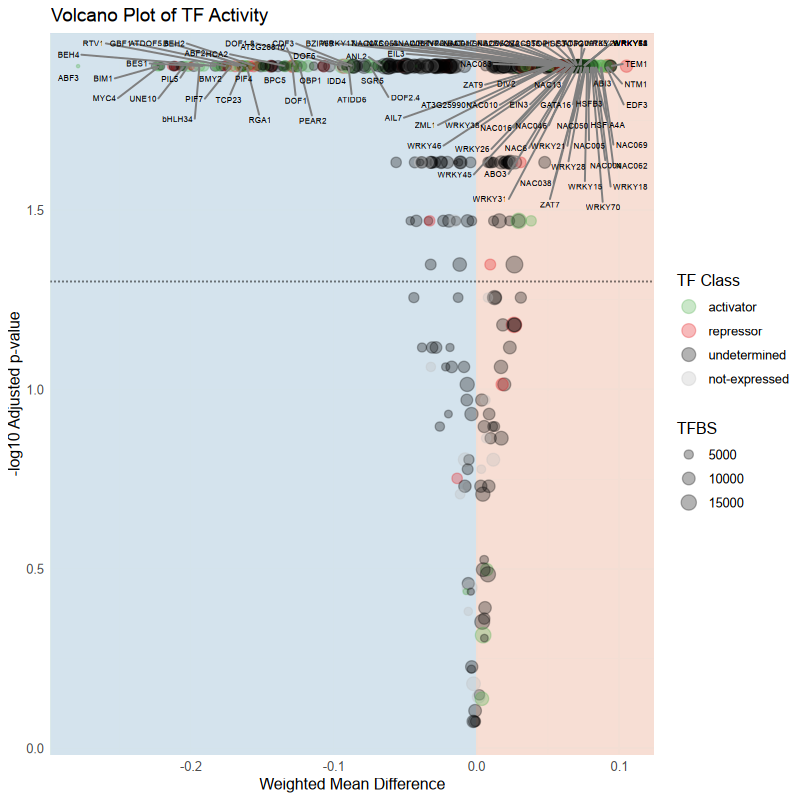

In [47]:
library(ggplot2)
library(dplyr)
library(ggrepel)
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
# Assuming 'df' is your dataframe name and it's already loaded in your environment
# Update the variable names and factors based on your specific dataframe

# Transforming p-values to a log scale for the plot and adding classifications
diffTF_result <- diffTF_result %>%
  mutate(
    pValueAdj_log10 = -log10(pvalueAdj + 1e-10), # Adjusting p-values
    significant = pvalueAdj < 0.05, # Define your significance level here
    TF_class = factor(classification_q0.001_final, levels = c("activator", "repressor", "undetermined", "not-expressed")), # Use the correct column name
    rank_pValueAdj_log10 = rank(-pValueAdj_log10) # Add this line to rank p-values
  )
# df
# Define the colors for the different classes
color_categories <- c("activator" = "#4daf4a", "repressor" = "#e41a1c", "undetermined" = "black", "not-expressed" = "grey")

# Plot with background color for weighted mean difference
plot <- ggplot(diffTF_result, aes(x = weighted_meanDifference, y = pValueAdj_log10)) +
  geom_rect(xmin = -Inf, xmax = 0, ymin = -Inf, ymax = Inf, fill = "#D6E5EF", alpha = 0.2) +  # Blue background for COL
  geom_rect(xmin = 0, xmax = Inf, ymin = -Inf, ymax = Inf, fill = "#F6DDD2", alpha = 0.2) +  # Red background for DM
  geom_point(aes(color = TF_class, size = TFBS), alpha = 0.3) +

  scale_color_manual(values = color_categories) +
  scale_size_continuous(name = "TFBS", range = c(0.1, 5)) +
  geom_hline(yintercept = -log10(0.05), linetype = "dotted") +  # Significance threshold line
  theme_minimal() +
  labs(title = 'Volcano Plot of TF Activity', x = 'Weighted Mean Difference', y = '-log10 Adjusted p-value') +
  theme(legend.position = "right") +
  guides(color = guide_legend(title = "TF Class", override.aes = list(size = 4)),
         size = guide_legend(title = "TFBS"))

plot <- plot +
  geom_text_repel(
    aes(label = ifelse(TF_class == "activator" & rank_pValueAdj_log10 <= 400 &
                    weighted_meanDifference %>% abs() > 0.05, 
                       as.character(gene_name), "")),
    size = 2,  # Adjust text size as needed
    max.overlaps = Inf,  # Allow for an infinite number of overlaps
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0, "lines"),
    segment.color = 'grey50'
  )


plot
# Save the plot if needed
# ggsave("improved_volcano_plot.pdf", width = 10, height = 8, dpi = 300)


In [48]:
diffTF_result %>% names

[1] "TF"                          "weighted_meanDifference"    
 [3] "weighted_CD"                 "TFBS"                       
 [5] "weighted_Tstat"              "variance"                   
 [7] "pvalue"                      "Cohend_factor"              
 [9] "pvalueAdj"                   "median.cor.tfs"             
[11] "classification_q0.1"         "classification_q0.05"       
[13] "classification_q0.01"        "classification_q0.001"      
[15] "classification_distr_rawP"   "classification_q0.1_final"  
[17] "classification_q0.05_final"  "classification_q0.01_final" 
[19] "classification_q0.001_final" "gene_name"                  
[21] "pValueAdj_log10"             "significant"                
[23] "TF_class"                    "rank_pValueAdj_log10"

In [49]:
diffTF_result_simplified <- diffTF_result %>% select( TF, TF_class, weighted_meanDifference, TFBS, pvalueAdj) %>% 
    filter(pvalueAdj < 0.05)
diffTF_result_simplified

TF        TF_class      weighted_meanDifference TFBS  pvalueAdj 
1   AT1G01250 undetermined  -0.02740                 6948 0.01256585
2   AT1G01260 undetermined  -0.20600                 4338 0.01256585
3   AT1G01720 undetermined   0.03200                 5237 0.01256585
4   AT1G02230 activator      0.08120                 8667 0.01256585
5   AT1G02250 activator      0.07810                10067 0.01256585
6   AT1G03800 undetermined  -0.03250                10741 0.01256585
7   AT1G03840 undetermined  -0.05000                15463 0.01256585
8   AT1G06070 activator      0.06120                 4843 0.01256585
9   AT1G06850 undetermined   0.03870                 4813 0.01256585
10  AT1G08000 repressor      0.04410                 7684 0.01256585
11  AT1G08010 repressor      0.04030                 7328 0.01256585
12  AT1G08320 activator      0.01850                 5444 0.01256585
13  AT1G09030 not-expressed  0.04220                 9758 0.01256585
14  AT1G09530 undetermined  -0.13900                 7552 0.01256585
15  AT1G09770 undetermined   0.06490                 2877 0.01256585
16  AT1G10120 undetermined  -0.18300                 6098 0.01256585
17  AT1G12260 repressor      0.06820                 6951 0.01256585
18  AT1G12610 undetermined   0.00625                 5172 0.01256585
19  AT1G12630 undetermined  -0.05000                 7150 0.01256585
20  AT1G13260 undetermined   0.02510                15755 0.01256585
21  AT1G13300 undetermined   0.04320                10194 0.01256585
22  AT1G13450 undetermined   0.03910                 7486 0.01256585
23  AT1G14580 activator     -0.08970                12870 0.01256585
24  AT1G16490 not-expressed  0.03310                11175 0.01256585
25  AT1G18330 undetermined  -0.02940                 9382 0.01256585
26  AT1G18570 activator      0.03040                11032 0.01256585
27  AT1G18960 not-expressed  0.04370                18253 0.01256585
28  AT1G19000 undetermined   0.01400                 9655 0.01256585
29  AT1G19040 undetermined   0.07270                 9024 0.01256585
30  AT1G19210 undetermined  -0.04080                 7659 0.01256585
⋮   ⋮         ⋮             ⋮                       ⋮     ⋮         
512 AT5G12870 repressor      0.03100                 6682 0.02329868
513 AT5G22220 undetermined  -0.01470                 1347 0.02329868
514 AT5G22990 not-expressed -0.03950                 8071 0.02329868
515 AT5G38800 not-expressed -0.03420                 7803 0.02329868
516 AT5G47660 undetermined  -0.01160                 9558 0.02329868
517 AT5G62000 undetermined   0.00922                 6590 0.02329868
518 AT5G62320 not-expressed  0.02610                 9056 0.02329868
519 AT5G64220 undetermined  -0.03930                 2766 0.02329868
520 AT5G64750 undetermined  -0.03830                 8167 0.02329868
521 AT5G65310 undetermined  -0.02040                 8913 0.02329868
522 AT1G17950 undetermined  -0.00330                 5468 0.03390674
523 AT1G65620 undetermined  -0.01930                 9849 0.03390674
524 AT1G74650 undetermined   0.02940                11113 0.03390674
525 AT2G41835 undetermined   0.01590                12709 0.03390674
526 AT2G42200 undetermined   0.02320                 5741 0.03390674
527 AT2G42430 undetermined   0.01190                 5845 0.03390674
528 AT2G45190 undetermined  -0.00637                 9488 0.03390674
529 AT3G16770 undetermined  -0.04640                 4208 0.03390674
530 AT3G23250 activator      0.02950                15318 0.03390674
531 AT3G30530 undetermined  -0.02330                 7672 0.03390674
532 AT3G48160 undetermined  -0.01440                 5027 0.03390674
533 AT3G49690 activator      0.03820                 6432 0.03390674
534 AT4G36900 undetermined  -0.03370                 4368 0.03390674
535 AT5G05550 undetermined  -0.04220                 7978 0.03390674
536 AT5G39760 repressor     -0.03280                 6409 0.03390674
537 AT5G67000 not-expressed -0.01550                 8657 0.03390674
53

In [50]:
library(stringr)

In [51]:
# Define the path to the directory containing the subdirectories
base_path <- './WGCNA_ATAC_integration/ame_results_with_shuffle/'
# base_path <- './WGCNA_ATAC_integration/ame_results_with_control/'

# List all subdirectories in the base_path
sub_dirs <- list.dirs(path = base_path, full.names = TRUE, recursive = FALSE)

read_and_prepare <- function(dir_path) {
  file_path <- file.path(dir_path, 'ame.tsv')
  
  # Check if the TSV file exists
  if (file.exists(file_path)) {
    data <- read_tsv(file_path, col_types = cols()) 
    
    # Check if data is a data frame and if it's not empty
    if (is.data.frame(data) && nrow(data) > 0) {
      # Check if the 'rank' column exists
      if ("rank" %in% names(data)) {
        # Proceed with filtering and mutating
        data <- data %>% 
          filter(str_detect(rank, '^\\d')) %>% 
          mutate(module = basename(dir_path))
        return(data)
      } else {
        # If 'rank' column doesn't exist, return a message or handle accordingly
        warning(paste("The 'rank' column does not exist in the file:", file_path))
        return(tibble())
      }
    } else {
      # Return an empty tibble if the data frame is empty or not a data frame
      return(tibble())
    }
  } else {
    # File does not exist, return an empty tibble
    return(tibble())
  }
}


# Apply the function to each subdirectory and combine the results
ame_result <- map_dfr(sub_dirs, read_and_prepare) %>% mutate(motif_DB = motif_DB %>% str_remove('/data/scan_motif/Ath_TF_binding_motifs_') %>% str_remove('.meme'))
# ame_result
# combined_data now contains all the data combined from each subdirectory
ame_result <- ame_result %>% left_join(map_id_name, by = c('motif_ID' = 'gene_id')) %>%
    mutate(motif_DB = motif_DB %>% str_remove('/data/scan_motif/Ath_TF_binding_motifs_')) %>%
    arrange(`adj_p-value`) %>% select(motif_ID, motif_alt_ID, consensus, `adj_p-value`, module ) %>% 
    dplyr::rename( 'enriched_module' = module) 

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

In [52]:
read_and_prepare_sequences <- function(dir_path) {
  file_path <- file.path(dir_path, 'sequences.tsv')
  
  # Check if the TSV file exists
  if (file.exists(file_path)) {
    data <- read_tsv(file_path, col_types = cols())
    
    # Check if data is a data frame and if it's not empty
    if (is.data.frame(data) && nrow(data) > 0) {
      # Perform any required filtering and mutation
      # For example, you might want to mutate the motif_DB column as you did before
      data <- data %>% 
        mutate(motif_DB = str_remove(motif_DB, '/data/scan_motif/Ath_TF_binding_motifs_'),
               enriched_module = basename(dir_path))
      return(data)
    } else {
      # Return an empty tibble if the data frame is empty or not a data frame
      return(tibble())
    }
  } else {
    # File does not exist, return an empty tibble
    return(tibble())
  }
}

# Apply the function to each subdirectory and combine the results
sequences_result <- map_dfr(sub_dirs, read_and_prepare_sequences)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

In [53]:
sequences_result_ori <- sequences_result

In [54]:
sequences_result <- sequences_result %>% mutate(TF_traget = seq_ID %>% str_extract('^AT\\dG\\d{5}')) %>% 
    filter(motif_ID != 'NA', class == 'tp') %>% 
    group_by(motif_ID,  enriched_module) %>% summarise(TFBS = n()) %>% 
    ungroup() %>% as.data.frame() %>% dplyr::rename(TF = motif_ID)
sequences_result

`summarise()` has grouped output by 'motif_ID'. You can override using the
`.groups` argument.


TF        enriched_module TFBS
1    AT1G01060 MEblue          272 
2    AT1G01060 MEcyan          257 
3    AT1G01060 MEdarkgreen      24 
4    AT1G01060 MEtan            46 
5    AT1G01250 MEblue          437 
6    AT1G01250 MEcyan          327 
7    AT1G01250 MEpurple         44 
8    AT1G01260 MEblue          599 
9    AT1G01260 MEcyan          497 
10   AT1G01260 MEdarkgreen      33 
11   AT1G01260 MEdarkred        30 
12   AT1G01260 MEpurple         85 
13   AT1G01720 MEcyan          624 
14   AT1G02230 MEcyan          241 
15   AT1G02250 MEblue           64 
16   AT1G02250 MEcyan          273 
17   AT1G03800 MEblue          527 
18   AT1G03800 MEcyan          472 
19   AT1G03800 MEdarkgreen      21 
20   AT1G03800 MEdarkred         5 
21   AT1G03800 MEdarkturquoise   7 
22   AT1G03800 MEgreenyellow    15 
23   AT1G03800 MEpurple         62 
24   AT1G03800 MEsalmon         13 
25   AT1G03800 MEtan            18 
26   AT1G03840 MEblue          392 
27   AT1G03840 MEcyan          366 
28   AT1G03840 MEgreenyellow    13 
29   AT1G03840 MEpurple         64 
30   AT1G06160 MEblue          185 
⋮    ⋮         ⋮               ⋮   
1823 AT5G66940 MEdarkgreen      84 
1824 AT5G66940 MEdarkred        41 
1825 AT5G66940 MEdarkturquoise   5 
1826 AT5G66940 MEgreenyellow    21 
1827 AT5G66940 MEmidnightblue   31 
1828 AT5G66940 MEpurple         94 
1829 AT5G66940 MEsalmon         14 
1830 AT5G66940 MEtan            48 
1831 AT5G67000 MEblue          437 
1832 AT5G67000 MEcyan          569 
1833 AT5G67000 MEdarkgreen      10 
1834 AT5G67000 MEdarkred        11 
1835 AT5G67000 MEdarkturquoise  11 
1836 AT5G67000 MEgreenyellow    24 
1837 AT5G67000 MEpurple         70 
1838 AT5G67000 MEsalmon         12 
1839 AT5G67000 MEtan            24 
1840 AT5G67190 MEblue          631 
1841 AT5G67190 MEcyan          505 
1842 AT5G67190 MEdarkgreen      14 
1843 AT5G67190 MEdarkred        12 
1844 AT5G67190 MEdarkturquoise   7 
1845 AT5G67190 MEgreenyellow    16 
1846 AT5G67190 MEpurple         67 
1847 AT5G67190 MEtan            22 
1848 AT5G67300 MEblue          118 
1849 AT5G67450 MEblue          273 
1850 AT5G67580 MEblue          104 
1851 AT5G67580 MEdarkturquoise   4 
1852 AT5G67580 MEgreenyellow    25

In [55]:
ame_result

motif_ID  motif_alt_ID consensus                      adj_p-value
1    AT2G45660 MP00076      TTTYTYTTTYTYTYTYTTTYT          1.55e-253  
2    AT2G01570 MP00611      VAGAAAAAGACAAAARNARR           4.19e-252  
3    AT5G17430 MP00610      AADAAARARAAAAARAGARA           9.60e-234  
4    AT2G45660 MP00076      TTTYTYTTTYTYTYTYTTTYT          5.05e-205  
5    AT2G01570 MP00611      VAGAAAAAGACAAAARNARR           3.08e-202  
6    AT5G17430 MP00610      AADAAARARAAAAARAGARA           5.05e-198  
7    AT4G38000 MP00478      HTTTTTWTTTTTTTTTTTTWWCTTTTTH   3.80e-161  
8    AT1G72050 MP00229      CYTCCTCCTCCTCCTCCTC            2.26e-158  
9    AT1G49480 MP00192      RAMAAAAAAAAAAAA                2.56e-157  
10   AT3G55370 MP00407      TTTWCTTTTTHHYTTTTTTTT          3.01e-153  
11   AT5G66940 MP00593      WHTTTTTTHYTTTTTACTTTTTNHTTTWW  2.73e-143  
12   AT4G38000 MP00478      HTTTTTWTTTTTTTTTTTTWWCTTTTTH   1.60e-138  
13   AT1G69570 MP00223      TTTTYACTTTTTYTTTTTTTTTTTTTW    4.44e-136  
14   AT1G49480 MP00192      RAMAAAAAAAAAAAA                8.08e-131  
15   AT3G55370 MP00407      TTTWCTTTTTHHYTTTTTTTT          1.41e-129  
16   AT5G02460 MP00483      RAAAAAGWAAAAARAAAAARA          1.89e-127  
17   AT5G66940 MP00593      WHTTTTTTHYTTTTTACTTTTTNHTTTWW  3.00e-123  
18   AT1G71450 MP00227      CDCCRCCRCCDCCRCCGYCR           6.18e-118  
19   AT2G01930 MP00253      GAGAGAGAGAGAGAGAGAGAGAGA       2.84e-113  
20   AT3G20310 MP00366      YCNCCNCCDYCDCCGCCGYCA          3.68e-110  
21   AT1G69570 MP00223      TTTTYACTTTTTYTTTTTTTTTTTTTW    1.64e-109  
22   AT5G42520 MP00540      CTCTCTCTCTCTCTCTCTCTC          1.51e-108  
23   AT5G47220 MP00548      YCDCCDCCDCCGCCGCCRYYD          5.90e-103  
24   AT5G44210 MP00542      YGGCGGHKRYGGCGGCGGMGR          1.10e-102  
25   AT5G02460 MP00483      RAAAAAGWAAAAARAAAAARA          3.73e-102  
26   AT1G72050 MP00229      CYTCCTCCTCCTCCTCCTC            3.87e-101  
27   AT3G50410 MP00402      HHYYTTYTTTTTTWVCTTTTT          5.52e-101  
28   AT2G40340 MP00302      GGMGGYGGHGGYGGYGGTGGW           2.85e-97  
29   AT5G25190 MP00526      HGGHGGHGGCGGCGGMGGW             5.31e-96  
30   AT1G51700 MP00199      AAAAAVAAAAAGTARAAAAWR           4.07e-95  
⋮    ⋮         ⋮            ⋮                              ⋮          
1823 AT3G17730 MP00363      WRCKTGTDNNACAAGBA              0.0137     
1824 AT4G38910 MP00480      AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG 0.0137     
1825 AT3G23210 MP00372      GTGNNNRVCACGTGBCDNHDBDH        0.0138     
1826 AT1G49010 MP00191      HWWAWYCTTATCYWH                0.0138     
1827 AT1G18960 MP00148      NADHWNHWWCAMCAACAHNWNH         0.0140     
1828 AT5G66940 MP00593      WHTTTTTTHYTTTTTACTTTTTNHTTTWW  0.0140     
1829 AT3G02150 MP00326      GTGGGGACCACWD                  0.0141     
1830 AT3G04060 MP00332      TWACGTGTDNNACAMGHAANY          0.0142     
1831 AT2G44940 MP00312      HDKTGTCGGTGRHDD                0.0143     
1832 AT1G49720 MP00087      GGMCACGTGGCVCRVVVGR            0.0144     
1833 AT1G71930 MP00017      RKACACGSAACY                   0.0145     
1834 AT1G24260 MP00605      CCAAAAAWGGAAA                  0.0146     
1835 AT2G33710 MP00289      CCDCCGCCGCCGYCR                0.0147     
1836 AT1G09540 MP00134      YYYAMCHACCAHHHH                0.0148     
1837 AT1G18960 MP00148      NADHWNHWWCAMCAACAHNWNH         0.0149     
1838 AT1G53170 MP00202      NCCDCCGCCGCCGYM                0.0150     
1839 AT3G06490 MP00334      TDRDDWAAGTTAGGY                0.0150     
1840 AT4G14770 MP00433      WTTYAAAATTYAAAW                0.0151     
1841 AT1G49720 MP00087      GGMCACGTGGCVCRVVVGR            0.0151     
1842 AT2G32460 MP00287      AAMHNTAACCGAAWH                0.0151     
1843 AT2G23290 MP00274      TAACBGWAWWAACH                 0.0153     
1844 AT5G04410 MP00059      NNRCAMGCCANN                   0.0153     
1845 AT4G36160 MP00471      CKTGWANHWCAMGCA                0.0155     
1846 AT5G46830 MP00547      WWYTGTACGGAH                   0.0156     
1847 AT3G10580 MP00344      R

In [56]:
diffTF_AME_WGCNA_modules <- diffTF_result_simplified %>% left_join(ame_result, by = c('TF' = 'motif_ID')) %>% 
    left_join(map_id_name, by = c('TF' = 'gene_id')) %>%  filter(!is.na(enriched_module)) %>% select(-TFBS) %>% 
    left_join(sequences_result, by = c('TF' = 'TF', 'enriched_module' = 'enriched_module')) %>% 
    left_join(Ath_TF_list %>% select(Gene_ID, Family), by = c('TF' = 'Gene_ID'))
diffTF_AME_WGCNA_modules 

TF        TF_class      weighted_meanDifference pvalueAdj  motif_alt_ID
1    AT1G01250 undetermined  -0.0274                 0.01256585 MP00120     
2    AT1G01250 undetermined  -0.0274                 0.01256585 MP00120     
3    AT1G01250 undetermined  -0.0274                 0.01256585 MP00120     
4    AT1G01260 undetermined  -0.2060                 0.01256585 MP00100     
5    AT1G01260 undetermined  -0.2060                 0.01256585 MP00100     
6    AT1G01260 undetermined  -0.2060                 0.01256585 MP00100     
7    AT1G01260 undetermined  -0.2060                 0.01256585 MP00100     
8    AT1G01260 undetermined  -0.2060                 0.01256585 MP00100     
9    AT1G01720 undetermined   0.0320                 0.01256585 MP00121     
10   AT1G02230 activator      0.0812                 0.01256585 MP00122     
11   AT1G02250 activator      0.0781                 0.01256585 MP00123     
12   AT1G02250 activator      0.0781                 0.01256585 MP00123     
13   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
14   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
15   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
16   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
17   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
18   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
19   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
20   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
21   AT1G03800 undetermined  -0.0325                 0.01256585 MP00124     
22   AT1G03840 undetermined  -0.0500                 0.01256585 MP00125     
23   AT1G03840 undetermined  -0.0500                 0.01256585 MP00125     
24   AT1G03840 undetermined  -0.0500                 0.01256585 MP00125     
25   AT1G03840 undetermined  -0.0500                 0.01256585 MP00125     
26   AT1G08320 activator      0.0185                 0.01256585 MP00131     
27   AT1G08320 activator      0.0185                 0.01256585 MP00131     
28   AT1G09530 undetermined  -0.1390                 0.01256585 MP00081     
29   AT1G09530 undetermined  -0.1390                 0.01256585 MP00081     
30   AT1G09530 undetermined  -0.1390                 0.01256585 MP00081     
⋮    ⋮         ⋮             ⋮                       ⋮          ⋮           
1617 AT5G67000 not-expressed -0.01550                0.03390674 MP00594     
1618 AT5G67000 not-expressed -0.01550                0.03390674 MP00594     
1619 AT5G67000 not-expressed -0.01550                0.03390674 MP00594     
1620 AT2G44840 undetermined  -0.03210                0.04487473 MP00311     
1621 AT2G44840 undetermined  -0.03210                0.04487473 MP00311     
1622 AT2G44840 undetermined  -0.03210                0.04487473 MP00311     
1623 AT2G44840 undetermined  -0.03210                0.04487473 MP00311     
1624 AT2G44840 undetermined  -0.03210                0.04487473 MP00311     
1625 AT2G45420 repressor      0.00958                0.04487473 MP00314     
1626 AT2G45420 repressor      0.00958                0.04487473 MP00314     
1627 AT2G45420 repressor      0.00958                0.04487473 MP00314     
1628 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1629 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1630 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1631 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1632 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1633 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1634 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1635 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1636 AT3G24050 undetermined   0.02650                0.04487473 MP00377     
1

In [57]:
Res_DM1_DM2d <- readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds') %>% filter(contrast %>% str_detect('DM1/DM2d')) %>% select(AGI, log2FoldChange)

In [58]:
diffTF_AME_WGCNA_modules_L2fold <- diffTF_AME_WGCNA_modules %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% 
    filter(abs(log2FoldChange) > 2) %>% rename(log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange)
diffTF_AME_WGCNA_modules_L2fold

TF        TF_class     weighted_meanDifference pvalueAdj  motif_alt_ID
1   AT1G01250 undetermined -0.0274                 0.01256585 MP00120     
2   AT1G01250 undetermined -0.0274                 0.01256585 MP00120     
3   AT1G01250 undetermined -0.0274                 0.01256585 MP00120     
4   AT1G02230 activator     0.0812                 0.01256585 MP00122     
5   AT1G02250 activator     0.0781                 0.01256585 MP00123     
6   AT1G02250 activator     0.0781                 0.01256585 MP00123     
7   AT1G08320 activator     0.0185                 0.01256585 MP00131     
8   AT1G08320 activator     0.0185                 0.01256585 MP00131     
9   AT1G12260 repressor     0.0682                 0.01256585 MP00136     
10  AT1G12260 repressor     0.0682                 0.01256585 MP00136     
11  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
12  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
13  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
14  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
15  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
16  AT1G19040 undetermined  0.0727                 0.01256585 MP00150     
17  AT1G19040 undetermined  0.0727                 0.01256585 MP00150     
18  AT1G19040 undetermined  0.0727                 0.01256585 MP00150     
19  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
20  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
21  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
22  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
23  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
24  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
25  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
26  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
27  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
28  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
29  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
30  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
⋮   ⋮         ⋮            ⋮                       ⋮          ⋮           
551 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
552 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
553 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
554 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
555 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
556 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
557 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
558 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
559 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
560 AT1G17950 undetermined -0.00330                0.03390674 MP00145     
561 AT1G74650 undetermined  0.02940                0.03390674 MP00235     
562 AT1G74650 undetermined  0.02940                0.03390674 MP00235     
563 AT1G74650 undetermined  0.02940                0.03390674 MP00235     
564 AT2G42200 undetermined  0.02320                0.03390674 MP00307     
565 AT3G23250 activator     0.02950                0.03390674 MP00375     
566 AT3G23250 activator     0.02950                0.03390674 MP00375     
567 AT3G23250 activator     0.02950                0.03390674 MP00375     
568 AT3G23250 activator     0.02950                0.03390674 MP00375     
569 AT3G23250 activator     0.02950                0.03390674 MP00375     
570 AT3G23250 activator     0.02950                0.03390674 MP00375     
571 AT3G23250 activator     0.02950                0.03390674 MP00375     
572 AT3G23250 activator     0

In [59]:
library(openxlsx)
library(dplyr)

# Define your color categories for the 'TF_class' column
color_categories <- c(
  "activator" = "#4daf4a", 
  "repressor" = "#d15859", 
  "undetermined" = "#95B2DE", 
  "not-expressed" = "grey"
)

# Create a new workbook
wb <- createWorkbook()

# Define the color mapping for the sheet tabs based on the module names
tab_colors <- c(
  "MEblue" = "#0000FF",
  "MEcyan" = "#00FFFF",
  "MEpurple" = "#800080",
  "MEtan" = "#D2B48C",
  "MEdarkgreen" = "#006400",
  "MEdarkred" = "#8B0000",
  "MEmidnightblue" = "#191970",
  "MEgreenyellow" = "#ADFF2F",
  "MEsalmon" = "#FA8072",
  "MEdarkturquoise" = "#00CED1"
)

df_to_write = diffTF_AME_WGCNA_modules_L2fold
# Loop through unique modules
for (i in unique(df_to_write$enriched_module)) {
    print(paste("Processing module:", i))
    # Add a worksheet for each module
    sheet_name <- i # Keep the 'ME' in the sheet name
    tab_color <- tab_colors[[sheet_name]] # Get the tab color for this module
    
    addWorksheet(wb, sheetName = sheet_name, tabColour = tab_color)
    
    # Get the data for the current module and arrange it
    module_data <- df_to_write %>% 
      filter(enriched_module == i) %>% 
      arrange(`adj_p-value`) 
    
    # Write the data to the worksheet
    writeData(wb, sheet_name, module_data)
    
    # Get the number of rows of data to determine where to apply styles
    num_rows <- nrow(module_data)
    
    # Apply styles to 'TF_class' column based on the color_categories
    if ("TF_class" %in% names(module_data)) {
      tf_class_col <- which(names(module_data) == "TF_class")
      for (row in 1:num_rows) {
        tf_class_value <- module_data[[row, "TF_class"]]
        if (!is.na(tf_class_value) && tf_class_value %in% names(color_categories)) {
          cell_style <- createStyle(fgFill = color_categories[tf_class_value])
          addStyle(wb, sheet = sheet_name, style = cell_style, rows = row + 1, cols = tf_class_col, gridExpand = TRUE)
        }
      }
    }
}

# Save the workbook
saveWorkbook(wb, file = "diffbind_results_2DM/motifs_and_classification2.xlsx", overwrite = TRUE)
diffTF_AME_WGCNA_modules_L2fold %>% write.csv('diffbind_results_2DM/diffTF_AME_WGCNA_modules_L2fold.csv')

[1] "Processing module: MEblue"
[1] "Processing module: MEcyan"
[1] "Processing module: MEpurple"
[1] "Processing module: MEtan"
[1] "Processing module: MEdarkturquoise"
[1] "Processing module: MEdarkgreen"
[1] "Processing module: MEmidnightblue"
[1] "Processing module: MEgreenyellow"
[1] "Processing module: MEdarkred"
[1] "Processing module: MEsalmon"


### Write out csv for Cytoscape

In [60]:
# First dataframe
df1 <- diffTF_AME_WGCNA_modules_L2fold %>% 
select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct
nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
# nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs_abs.csv', row.names = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>% select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 
edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
edges %>% sample_n(2)


[1] 173

ID        gene_name TF_class      Family pvalueAdj  consensus        
1 AT4G18450 AT4G18450 not-expressed ERF    0.01256585 RYGGCGGCGGHGGHGGH
2 AT2G18060 VND1      repressor     NAC    0.01256585 CKTGWDNHDYAMG    
  log2FoldChange_DM1_2d_vs_Col_14 group subgroup
1  2.464087                       TF    ERF     
2 -3.830723                       TF    NAC

source    target   interaction  weight
1 AT1G77200 MEcyan   undetermined 265   
2 AT4G17490 MEpurple undetermined  42

In [61]:
getwd()

[1] "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d"

### import ChromVar data3

In [62]:
library(reshape2)
library(corrplot)

In [63]:
Cor_matrix_all<- readRDS("./ChromVAR/Rdata/Cor_matrix_all.rds")
Synergy_matrix_all <- readRDS("./ChromVAR/Rdata/Synergy_matrix_all.rds")

In [64]:
# Create a named vector for mapping
name_mapping <- setNames(map_id_name$gene_name, map_id_name$gene_id)
# name_mapping

In [65]:
nodes_top2_each_Family <- nodes %>% filter(log2FoldChange_DM1_2d_vs_Col_14 > 3) %>% filter(ID %>% str_detect('^AT') )%>% group_by(Family) %>% 
    arrange(desc(log2FoldChange_DM1_2d_vs_Col_14)) %>% top_n(2, log2FoldChange_DM1_2d_vs_Col_14) %>% 
    arrange(Family)

In [66]:
Cor_test <- Cor_matrix_all[nodes_top2_each_Family$ID, nodes_top2_each_Family$ID]
Syn_test <- Synergy_matrix_all[nodes_top2_each_Family$ID, nodes_top2_each_Family$ID]
rownames(Cor_test) <- name_mapping[rownames(Cor_test)]
colnames(Cor_test) <- name_mapping[colnames(Cor_test)]
rownames(Syn_test) <- name_mapping[rownames(Syn_test)]
colnames(Syn_test) <- name_mapping[colnames(Syn_test)]

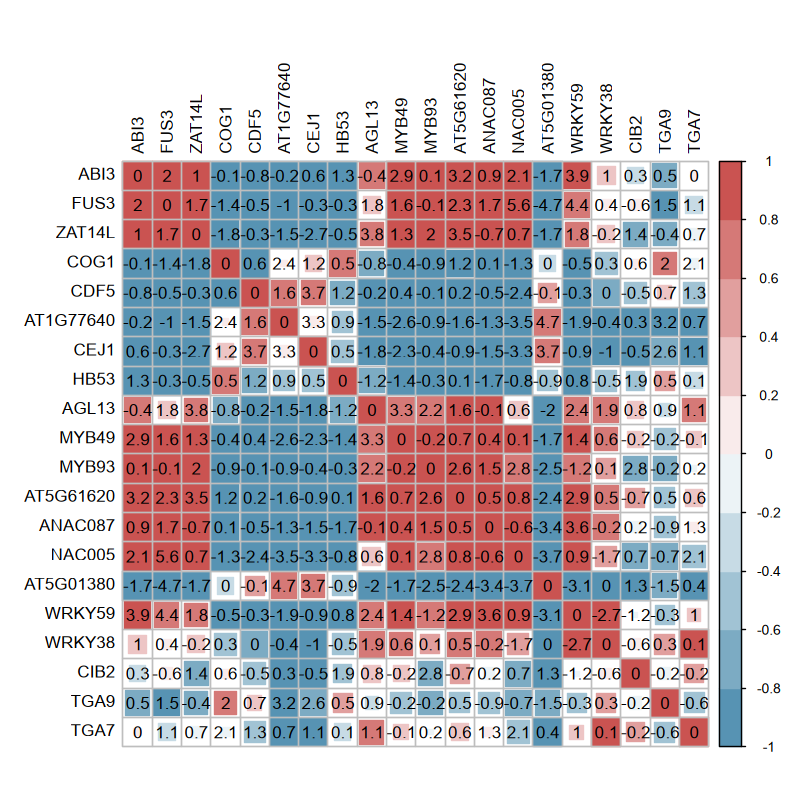

In [67]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

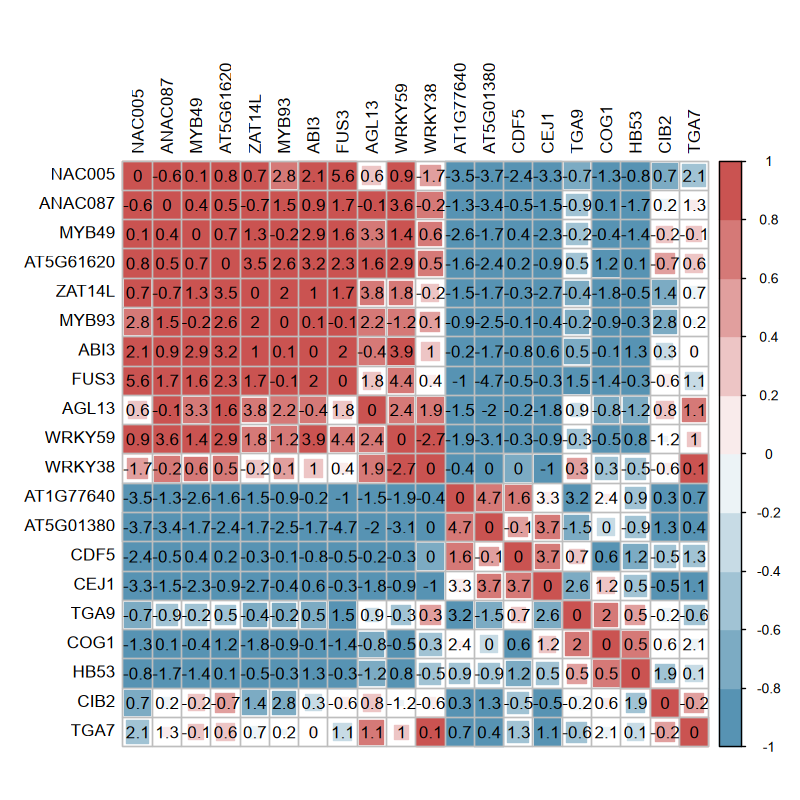

In [68]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'hclust', 
         col = myColors, 
         tl.col = 'black',

         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

In [69]:
# Start capturing the plot output to a file
pdf("corrplot.pdf", width=8, height=8)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()

png 
  2

In [70]:
#sorted selected
selected_TF <- c('AT4G38000','AT1G02230','AT3G04060','AT4G29230','AT5G13180','AT5G39610','AT5G01380','AT1G66600','AT4G31800','AT2G30250','AT5G22570','AT2G46400','AT3G10800','AT5G65210','AT1G08320')

In [71]:
Cor_test <- Cor_matrix_all[selected_TF, selected_TF]
Syn_test <- Synergy_matrix_all[selected_TF, selected_TF]
rownames(Cor_test) <- name_mapping[rownames(Cor_test)]
colnames(Cor_test) <- name_mapping[colnames(Cor_test)]
rownames(Syn_test) <- name_mapping[rownames(Syn_test)]
colnames(Syn_test) <- name_mapping[colnames(Syn_test)]

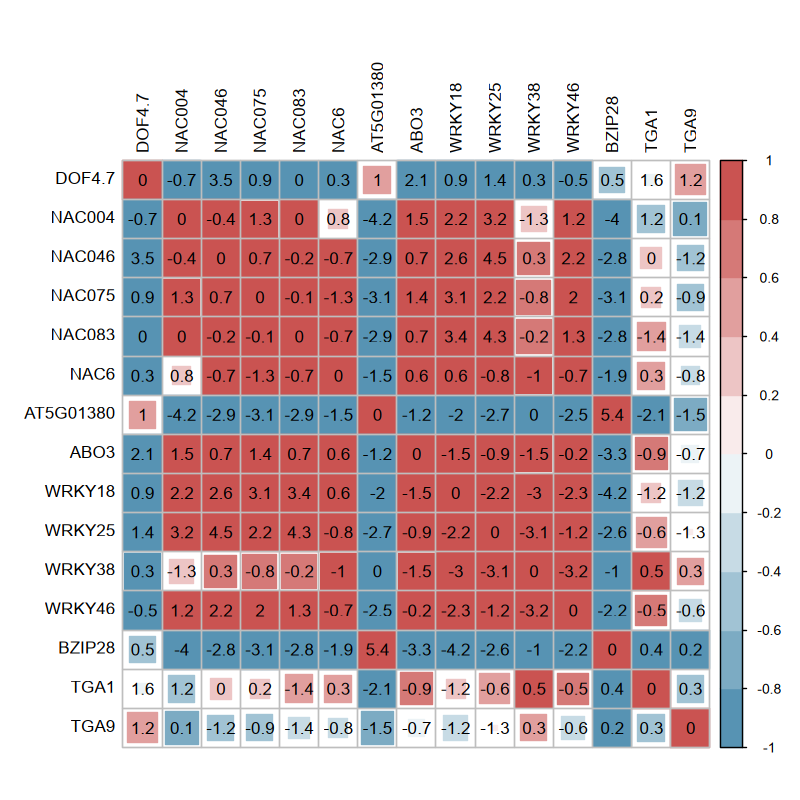

In [72]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

plot <- corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',

         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

In [73]:
pdf("./plots/corrplot.pdf", width=7.6, height=7.6)

myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 1,
         number.cex = 0.0001, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()

png 
  2

In [74]:
allMotifs <- read.csv('/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.allMotifs.tsv', sep = '\t') 

In [75]:
allMotifs %>% head

permutation                                                                                    
1 ../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0
2 ../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0
3 ../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0
4 ../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0
5 ../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0
6 ../output_2DMs_correct/TF-SPECIFIC/AT1G01060/extension100/COLvsDM.all.AT1G01060.output.tsv.gz:0
  TF        chr  MSS      MES      TFBSID                 strand
1 AT1G01060 chr1 10020377 10020587 chr1:10020377-10020587 -     
2 AT1G01060 chr1 10025609 10025819 chr1:10025609-10025819 -     
3 AT1G01060 chr1 10033654 10033864 chr1:10033654-10033864 -     
4 AT1G01060 chr1 10050187 10050397 chr1:10050187-10050397 -     
5 AT1G01060 chr1 10053681 10053891 chr1:10053681-10053891 -     
6 AT1G01060 chr1 10055813 10056023 chr1:10055813-10056023 -     
  peakID                 l2FC    limma_avgExpr limma_B limma_t_stat DESeq_ldcSE
1 chr1:10020021-10020531 -0.0440 6.96          -6.810  -0.369       NA         
2 chr1:10025659-10026539  0.1890 6.94          -5.230   1.860       NA         
3 chr1:10033450-10034376  0.0562 7.50          -6.750   0.499       NA         
4 chr1:10050202-10050394 -0.9760 7.42           0.194  -4.590       NA         
5 chr1:10052827-10054516 -0.6230 8.31           3.620  -6.320       NA         
6 chr1:10055379-10055976 -1.0300 7.58           2.380  -5.670       NA         
  DESeq_stat DESeq_baseMean pval     pval_adj
1 NA         NA             7.17e-01 0.784000
2 NA         NA             8.04e-02 0.146000
3 NA         NA             6.24e-01 0.708000
4 NA         NA             2.85e-04 0.001900
5 NA         NA             9.28e-06 0.000181
6 NA         NA             3.19e-05 0.000401

In [76]:
allMotifs %>% filter(l2FC > 2) %>% nrow

[1] 0

In [77]:
allMotifs %>% filter(l2FC < -2) %>% nrow

[1] 370

In [78]:
allMotifs %>% filter(l2FC > 1) %>% nrow

[1] 7883

##### l2FC here is the motif opening, DM vs WT

In [79]:
library(ChIPseeker)
library(TxDb.Athaliana.BioMart.plantsmart51)



ChIPseeker v1.38.0

If you use ChIPseeker in published research, please cite:
Qianwen Wang, Ming Li, Tianzhi Wu, Li Zhan, Lin Li, Meijun Chen, Wenqin Xie, Zijing Xie, Erqiang Hu, Shuangbin Xu, Guangchuang Yu. Exploring epigenomic datasets by ChIPseeker. Current Protocols 2022, 2(10): e585

Loading required package: GenomicFeatures

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Posit

In [80]:
library(dplyr)
library(GenomicRanges)

# Extract and transform the necessary columns
allMotifs_transformed <- allMotifs %>%
  mutate(
    chr = gsub("chr", "", chr), # Remove 'chr' from chromosome column
    start = as.numeric(gsub(".*:(\\d+)-\\d+", "\\1", peakID)), # Extract start position
    end = as.numeric(gsub(".*:\\d+-(\\d+)", "\\1", peakID)) # Extract end position
  )

# Create a GRanges object
granges_obj <- GRanges(
  seqnames = Rle(allMotifs_transformed$chr),
  ranges = IRanges(start = allMotifs_transformed$start, end = allMotifs_transformed$end),
  strand = Rle(strand(allMotifs_transformed$strand))    
)

# Add TF as metadata
mcols(granges_obj)$TF <- allMotifs_transformed$TF
mcols(granges_obj)$peakID <- allMotifs_transformed$peakID

granges_obj

GRanges object with 4977911 ranges and 2 metadata columns:
            seqnames            ranges strand |          TF
               <Rle>         <IRanges>  <Rle> | <character>
        [1]        1 10020021-10020531      - |   AT1G01060
        [2]        1 10025659-10026539      - |   AT1G01060
        [3]        1 10033450-10034376      - |   AT1G01060
        [4]        1 10050202-10050394      - |   AT1G01060
        [5]        1 10052827-10054516      - |   AT1G01060
        ...      ...               ...    ... .         ...
  [4977907]        5   9940599-9941159      + |   AT5G67580
  [4977908]        5     996550-997478      - |   AT5G67580
  [4977909]        5   9968914-9969679      + |   AT5G67580
  [4977910]        5   9974520-9975810      - |   AT5G67580
  [4977911]        5     997676-998485      - |   AT5G67580
                            peakID
                       <character>
        [1] chr1:10020021-10020531
        [2] chr1:10025659-10026539
        [3] chr1:1003

In [81]:
# Annotate peaks
txdb <- TxDb.Athaliana.BioMart.plantsmart51
annotated_peaks <- annotatePeak(granges_obj, TxDb = txdb, level = "gene")

>> preparing features information...		 2025-07-06 14:19:08 
>> identifying nearest features...		 2025-07-06 14:19:09 
>> calculating distance from peak to TSS...	 2025-07-06 14:19:53 
>> assigning genomic annotation...		 2025-07-06 14:19:53 
>> assigning chromosome lengths			 2025-07-06 14:20:19 
>> done...					 2025-07-06 14:20:19 


In [82]:
TF_peak_annotated <- as_tibble(annotated_peaks@anno) %>% filter( distanceToTSS %>% abs() < 20000 )
TF_peak_annotated

seqnames start    end      width strand TF       
1       1        10020021 10020531  511  -      AT1G01060
2       1        10025659 10026539  881  -      AT1G01060
3       1        10033450 10034376  927  -      AT1G01060
4       1        10050202 10050394  193  -      AT1G01060
5       1        10052827 10054516 1690  -      AT1G01060
6       1        10055379 10055976  598  -      AT1G01060
7       1         1006358  1006626  269  -      AT1G01060
8       1        10074221 10075193  973  -      AT1G01060
9       1        10110573 10111709 1137  -      AT1G01060
10      1        10126239 10126913  675  +      AT1G01060
11      1        10138765 10139234  470  -      AT1G01060
12      1        10144570 10144948  379  +      AT1G01060
13      1        10149296 10150003  708  +      AT1G01060
14      1        10162726 10163700  975  -      AT1G01060
15      1        10167142 10167805  664  -      AT1G01060
16      1        10168678 10169761 1084  +      AT1G01060
17      1        10173636 10173948  313  +      AT1G01060
18      1        10190574 10193109 2536  -      AT1G01060
19      1        10198304 10201686 3383  +      AT1G01060
20      1        10214763 10216113 1351  +      AT1G01060
21      1        10233016 10233716  701  +      AT1G01060
22      1        10235932 10237557 1626  +      AT1G01060
23      1        10246021 10246453  433  +      AT1G01060
24      1        10246651 10247711 1061  +      AT1G01060
25      1        10256869 10257277  409  -      AT1G01060
26      1        10284011 10285750 1740  -      AT1G01060
27      1        10287567 10288419  853  -      AT1G01060
28      1        10294544 10294945  402  -      AT1G01060
29      1        10297236 10299457 2222  +      AT1G01060
30      1        10324974 10325264  291  +      AT1G01060
⋮       ⋮        ⋮        ⋮        ⋮     ⋮      ⋮        
4901722 5        9636428  9637588  1161  +      AT5G67580
4901723 5        9638112  9639009   898  -      AT5G67580
4901724 5        9641495  9643551  2057  -      AT5G67580
4901725 5        9663030  9663710   681  +      AT5G67580
4901726 5        9675421  9676502  1082  -      AT5G67580
4901727 5         968715   969411   697  -      AT5G67580
4901728 5        9693294  9695025  1732  +      AT5G67580
4901729 5         970588   970981   394  +      AT5G67580
4901730 5        9710891  9712386  1496  +      AT5G67580
4901731 5        9713409  9714107   699  +      AT5G67580
4901732 5        9736783  9738488  1706  +      AT5G67580
4901733 5        9763981  9764239   259  +      AT5G67580
4901734 5        9771016  9771478   463  -      AT5G67580
4901735 5        9775853  9777614  1762  -      AT5G67580
4901736 5        9788093  9790055  1963  -      AT5G67580
4901737 5        9797583  9799247  1665  +      AT5G67580
4901738 5        9807085  9808623  1539  +      AT5G67580
4901739 5        9811953  9815532  3580  -      AT5G67580
4901740 5        9828208  9829296  1089  -      AT5G67580
4901741 5        9835667  9836048   382  +      AT5G67580
4901742 5        9836607  9839027  2421  -      AT5G67580
4901743 5        9852446  9853053   608  -      AT5G67580
4901744 5        9873618  9874882  1265  -      AT5G67580
4901745 5        9879020  9880166  1147  +      AT5G67580
4901746 5        9894632  9896765  2134  -      AT5G67580
4901747 5        9940599  9941159   561  +      AT5G67580
4901748 5         996550   997478   929  -      AT5G67580
4901749 5        9968914  9969679   766  +      AT5G67580
4901750 5        9974520  9975810  1291  -      AT5G67580
4901751 5         997676   998485   810  -      AT5G67580
        peakID                 annotation        geneChr geneStart geneEnd 
1       chr1:10020021-10020531 Promoter (1-2kb)  1       10018691  10020479
2       chr1:10025659-10026539 Promoter (2-3kb)  1       10023817  10026311
3       chr1:10033450-10034376 Promoter (2-3kb)  1       10035617  10037403
4       chr1:10050202-10050394 Promoter (1-2kb)  1       10047276  10049343
5       chr1:10052827-10054516 P

In [83]:
TF_peak_annotated

seqnames start    end      width strand TF       
1       1        10020021 10020531  511  -      AT1G01060
2       1        10025659 10026539  881  -      AT1G01060
3       1        10033450 10034376  927  -      AT1G01060
4       1        10050202 10050394  193  -      AT1G01060
5       1        10052827 10054516 1690  -      AT1G01060
6       1        10055379 10055976  598  -      AT1G01060
7       1         1006358  1006626  269  -      AT1G01060
8       1        10074221 10075193  973  -      AT1G01060
9       1        10110573 10111709 1137  -      AT1G01060
10      1        10126239 10126913  675  +      AT1G01060
11      1        10138765 10139234  470  -      AT1G01060
12      1        10144570 10144948  379  +      AT1G01060
13      1        10149296 10150003  708  +      AT1G01060
14      1        10162726 10163700  975  -      AT1G01060
15      1        10167142 10167805  664  -      AT1G01060
16      1        10168678 10169761 1084  +      AT1G01060
17      1        10173636 10173948  313  +      AT1G01060
18      1        10190574 10193109 2536  -      AT1G01060
19      1        10198304 10201686 3383  +      AT1G01060
20      1        10214763 10216113 1351  +      AT1G01060
21      1        10233016 10233716  701  +      AT1G01060
22      1        10235932 10237557 1626  +      AT1G01060
23      1        10246021 10246453  433  +      AT1G01060
24      1        10246651 10247711 1061  +      AT1G01060
25      1        10256869 10257277  409  -      AT1G01060
26      1        10284011 10285750 1740  -      AT1G01060
27      1        10287567 10288419  853  -      AT1G01060
28      1        10294544 10294945  402  -      AT1G01060
29      1        10297236 10299457 2222  +      AT1G01060
30      1        10324974 10325264  291  +      AT1G01060
⋮       ⋮        ⋮        ⋮        ⋮     ⋮      ⋮        
4901722 5        9636428  9637588  1161  +      AT5G67580
4901723 5        9638112  9639009   898  -      AT5G67580
4901724 5        9641495  9643551  2057  -      AT5G67580
4901725 5        9663030  9663710   681  +      AT5G67580
4901726 5        9675421  9676502  1082  -      AT5G67580
4901727 5         968715   969411   697  -      AT5G67580
4901728 5        9693294  9695025  1732  +      AT5G67580
4901729 5         970588   970981   394  +      AT5G67580
4901730 5        9710891  9712386  1496  +      AT5G67580
4901731 5        9713409  9714107   699  +      AT5G67580
4901732 5        9736783  9738488  1706  +      AT5G67580
4901733 5        9763981  9764239   259  +      AT5G67580
4901734 5        9771016  9771478   463  -      AT5G67580
4901735 5        9775853  9777614  1762  -      AT5G67580
4901736 5        9788093  9790055  1963  -      AT5G67580
4901737 5        9797583  9799247  1665  +      AT5G67580
4901738 5        9807085  9808623  1539  +      AT5G67580
4901739 5        9811953  9815532  3580  -      AT5G67580
4901740 5        9828208  9829296  1089  -      AT5G67580
4901741 5        9835667  9836048   382  +      AT5G67580
4901742 5        9836607  9839027  2421  -      AT5G67580
4901743 5        9852446  9853053   608  -      AT5G67580
4901744 5        9873618  9874882  1265  -      AT5G67580
4901745 5        9879020  9880166  1147  +      AT5G67580
4901746 5        9894632  9896765  2134  -      AT5G67580
4901747 5        9940599  9941159   561  +      AT5G67580
4901748 5         996550   997478   929  -      AT5G67580
4901749 5        9968914  9969679   766  +      AT5G67580
4901750 5        9974520  9975810  1291  -      AT5G67580
4901751 5         997676   998485   810  -      AT5G67580
        peakID                 annotation        geneChr geneStart geneEnd 
1       chr1:10020021-10020531 Promoter (1-2kb)  1       10018691  10020479
2       chr1:10025659-10026539 Promoter (2-3kb)  1       10023817  10026311
3       chr1:10033450-10034376 Promoter (2-3kb)  1       10035617  10037403
4       chr1:10050202-10050394 Promoter (1-2kb)  1       10047276  10049343
5       chr1:10052827-10054516 P

In [84]:
proportion_l2FC_per_TF <- allMotifs %>%
    filter(pval_adj < 0.05) %>% 
  group_by(TF) %>% 
  summarise(
    positive_peak = sum(l2FC > 0, na.rm = TRUE),
    negative_peak = sum(l2FC < 0, na.rm = TRUE),
    total_peak = n(),
    proportion_positive = positive_peak / total_peak,
    proportion_negative = negative_peak / total_peak
  )

In [85]:
proportion_l2FC_per_TF %>% filter(TF == 'AT5G01900')

TF        positive_peak negative_peak total_peak proportion_positive
1 AT5G01900 1114          1558          2672       0.4169162          
  proportion_negative
1 0.5830838

In [86]:
connectivity_table_info <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')

In [87]:
connectivity_table <- connectivity_table_info %>% dplyr::select(gene, connectivity_rowSums_adj, module, gene_name)

In [88]:
TF_peak_annotated_in_WGCNA <- TF_peak_annotated %>% left_join(connectivity_table, by = c('geneId' = 'gene')) %>% filter( !is.na(module) ) 

In [89]:
##peakID is contain the TFBS, which belong to geneID, geneID is in module
TF_peak_annotated_in_WGCNA <- TF_peak_annotated_in_WGCNA %>% dplyr::select(TF, peakID, geneId, connectivity_rowSums_adj, module  ) %>% left_join(allMotifs, by = c('TF' = 'TF','peakID' = 'peakID')) 

In [90]:
TF_peak_annotated_in_WGCNA

TF        peakID                 geneId    connectivity_rowSums_adj
1       AT1G01060 chr1:10055379-10055976 AT1G28610 1320.3847               
2       AT1G01060 chr1:10138765-10139234 AT1G29050 1596.3479               
3       AT1G01060 chr1:10149296-10150003 AT1G29070 1337.0334               
4       AT1G01060 chr1:10190574-10193109 AT1G29170  164.3499               
5       AT1G01060 chr1:10233016-10233716 AT1G29280 1547.0193               
6       AT1G01060 chr1:10235932-10237557 AT1G29280 1547.0193               
7       AT1G01060 chr1:10246021-10246453 AT1G29290 1780.8018               
8       AT1G01060 chr1:10287567-10288419 AT1G29390 1707.2875               
9       AT1G01060 chr1:10294544-10294945 AT1G29400 1806.3493               
10      AT1G01060 chr1:10351819-10354232 AT1G29640 1579.6212               
11      AT1G01060 chr1:10374808-10375873 AT1G29670 1651.0020               
12      AT1G01060 chr1:10385514-10387086 AT1G29700 1707.1268               
13      AT1G01060 chr1:10470508-10471882 AT1G29910 1528.3904               
14      AT1G01060 chr1:10477148-10478708 AT1G29930 1519.7361               
15      AT1G01060 chr1:10479270-10480006 AT1G29930 1519.7361               
16      AT1G01060 chr1:10536892-10538692 AT1G30040 1671.6338               
17      AT1G01060 chr1:10633692-10634832 AT1G30220 1701.1359               
18      AT1G01060 chr1:10657821-10658714 AT1G30270 1785.0323               
19      AT1G01060 chr1:10684919-10685278 AT1G30320 1629.9580               
20      AT1G01060 chr1:10848632-10851183 AT1G30610 1600.0443               
21      AT1G01060 chr1:10856093-10858222 AT1G30620 1902.9523               
22      AT1G01060 chr1:10862877-10864235 AT1G30640 1735.6565               
23      AT1G01060 chr1:10891237-10891574 AT1G30700 1901.5975               
24      AT1G01060 chr1:10897461-10899590 AT1G30720 1627.5804               
25      AT1G01060 chr1:10899927-10900600 AT1G30730 1772.1194               
26      AT1G01060 chr1:11086355-11087569 AT1G31070 1755.7267               
27      AT1G01060 chr1:11112597-11113031 AT1G31130 1887.6079               
28      AT1G01060 chr1:11215631-11216349 AT1G31330 1623.6991               
29      AT1G01060 chr1:11287665-11290386 AT1G31540 1707.3653               
30      AT1G01060 chr1:11291632-11292418 AT1G31540 1707.3653               
⋮       ⋮         ⋮                      ⋮         ⋮                       
1129958 AT5G67580 chr5:8267703-8269288   AT5G24300 1795.46463              
1129959 AT5G67580 chr5:8323331-8323836   AT5G24380  160.59980              
1129960 AT5G67580 chr5:8336639-8337372   AT5G24420   71.82060              
1129961 AT5G67580 chr5:8340824-8341495   AT5G24430 1903.94811              
1129962 AT5G67580 chr5:835235-836632     AT5G03390  850.03439              
1129963 AT5G67580 chr5:8356208-8357494   AT5G24470   68.75528              
1129964 AT5G67580 chr5:8366128-8367941   AT5G24490 1418.66070              
1129965 AT5G67580 chr5:8423300-8423624   AT5G24600 1707.81288              
1129966 AT5G67580 chr5:8501386-8502620   AT5G24770   71.98711              
1129967 AT5G67580 chr5:8508456-8509119   AT5G24780   72.34459              
1129968 AT5G67580 chr5:872266-873276     AT5G03490 1582.55481              
1129969 AT5G67580 chr5:8854456-8855710   AT5G25440 1560.29601              
1129970 AT5G67580 chr5:8909260-8910183   AT5G25590 1716.54347              
1129971 AT5G67580 chr5:898575-900606     AT5G03555  181.02668              
1129972 AT5G67580 chr5:8994579-8995166   AT5G25820 1653.66298              
1129973 AT5G67580 chr5:9072580-9072917   AT5G25980  872.91550              
1129974 AT5G67580 chr5:9096313-9096906   AT5G26030 1895.28065              
1129975 AT5G67580 chr5:914353-914556     AT5G03610 1767.66421              
1129976 AT5G67580 chr5:9206537-9207303   AT5G26270   64.67416              
1129977 AT5G67580 chr5:9245732-9246490   AT5G26340 1873.29962              
1129978 AT5G67580 chr5:9247967-9248425   AT5G26340 1873.

In [91]:
TF_peak_annotated_in_WGCNA_meidan_l2FC <- TF_peak_annotated_in_WGCNA %>% 
     filter(pval_adj < 0.05) %>% 
      group_by(TF, module) %>%
  summarise(median_l2FC = median(l2FC, na.rm = TRUE),  
        positive_peak = sum(l2FC > 0, na.rm = TRUE),
        negative_peak = sum(l2FC < 0, na.rm = TRUE),
        total_peak = n(),
        proportion_positive = positive_peak / total_peak,
        proportion_negative = negative_peak / total_peak) %>% ungroup()

`summarise()` has grouped output by 'TF'. You can override using the `.groups`
argument.


In [92]:
connectivity_table %>% group_by(module) %>% tally %>% dplyr::rename('number_of_genes' = 'n')

module          number_of_genes
1  MEblue          2222           
2  MEcyan          2490           
3  MEdarkgreen       84           
4  MEdarkred         93           
5  MEdarkturquoise   33           
6  MEgreenyellow     93           
7  MEmidnightblue    58           
8  MEpurple         234           
9  MEsalmon          63           
10 MEtan             84

In [93]:
TF_peak_annotated_in_WGCNA_meidan_l2FC <- TF_peak_annotated_in_WGCNA %>% 
     filter(pval_adj < 0.05) %>% 
      group_by(TF, module) %>%
  summarise(median_l2FC = median(l2FC, na.rm = TRUE),  
        positive_peak = sum(l2FC > 0, na.rm = TRUE),
        negative_peak = sum(l2FC < 0, na.rm = TRUE),
        total_peak = n(),
        proportion_positive = positive_peak / total_peak,
        proportion_negative = negative_peak / total_peak) %>% ungroup() %>% left_join(
          connectivity_table %>% group_by(module) %>% tally %>% dplyr::rename('number_of_genes_in_module' = 'n'), by = 'module') %>% mutate(
      avg_peak_per_gene_in_module = total_peak / number_of_genes_in_module)

`summarise()` has grouped output by 'TF'. You can override using the `.groups`
argument.


In [94]:
TF_peak_annotated_in_WGCNA_meidan_l2FC%>% filter(TF == 'AT5G01900')

TF        module         median_l2FC positive_peak negative_peak total_peak
1 AT5G01900 MEblue         -0.6145      37           243           280       
2 AT5G01900 MEcyan          0.3335     204           156           360       
3 AT5G01900 MEdarkgreen    -0.4660       1             7             8       
4 AT5G01900 MEdarkred      -0.5695       2             8            10       
5 AT5G01900 MEgreenyellow  -0.4680       2             9            11       
6 AT5G01900 MEmidnightblue -0.3620       2             4             6       
7 AT5G01900 MEpurple       -0.7730       2            19            21       
8 AT5G01900 MEsalmon        0.3115      12             6            18       
9 AT5G01900 MEtan          -0.6660       2             6             8       
  proportion_positive proportion_negative number_of_genes_in_module
1 0.1321429           0.8678571           2222                     
2 0.5666667           0.4333333           2490                     
3 0.1250000           0.8750000             84                     
4 0.2000000           0.8000000             93                     
5 0.1818182           0.8181818             93                     
6 0.3333333           0.6666667             58                     
7 0.0952381           0.9047619            234                     
8 0.6666667           0.3333333             63                     
9 0.2500000           0.7500000             84                     
  avg_peak_per_gene_in_module
1 0.12601260                 
2 0.14457831                 
3 0.09523810                 
4 0.10752688                 
5 0.11827957                 
6 0.10344828                 
7 0.08974359                 
8 0.28571429                 
9 0.09523810

In [95]:
diffTF_AME_WGCNA_modules_L2fold %>% write.csv('diffbind_results_2DM/diffTF_AME_WGCNA_modules_L2fold.csv', row.names = FALSE)

In [96]:
diffTF_AME_WGCNA_modules_L2fold

TF        TF_class     weighted_meanDifference pvalueAdj  motif_alt_ID
1   AT1G01250 undetermined -0.0274                 0.01256585 MP00120     
2   AT1G01250 undetermined -0.0274                 0.01256585 MP00120     
3   AT1G01250 undetermined -0.0274                 0.01256585 MP00120     
4   AT1G02230 activator     0.0812                 0.01256585 MP00122     
5   AT1G02250 activator     0.0781                 0.01256585 MP00123     
6   AT1G02250 activator     0.0781                 0.01256585 MP00123     
7   AT1G08320 activator     0.0185                 0.01256585 MP00131     
8   AT1G08320 activator     0.0185                 0.01256585 MP00131     
9   AT1G12260 repressor     0.0682                 0.01256585 MP00136     
10  AT1G12260 repressor     0.0682                 0.01256585 MP00136     
11  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
12  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
13  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
14  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
15  AT1G18330 undetermined -0.0294                 0.01256585 MP00146     
16  AT1G19040 undetermined  0.0727                 0.01256585 MP00150     
17  AT1G19040 undetermined  0.0727                 0.01256585 MP00150     
18  AT1G19040 undetermined  0.0727                 0.01256585 MP00150     
19  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
20  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
21  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
22  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
23  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
24  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
25  AT1G19210 undetermined -0.0408                 0.01256585 MP00151     
26  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
27  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
28  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
29  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
30  AT1G21910 undetermined -0.0294                 0.01256585 MP00156     
⋮   ⋮         ⋮            ⋮                       ⋮          ⋮           
551 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
552 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
553 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
554 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
555 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
556 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
557 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
558 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
559 AT5G64750 undetermined -0.03830                0.02329868 MP00584     
560 AT1G17950 undetermined -0.00330                0.03390674 MP00145     
561 AT1G74650 undetermined  0.02940                0.03390674 MP00235     
562 AT1G74650 undetermined  0.02940                0.03390674 MP00235     
563 AT1G74650 undetermined  0.02940                0.03390674 MP00235     
564 AT2G42200 undetermined  0.02320                0.03390674 MP00307     
565 AT3G23250 activator     0.02950                0.03390674 MP00375     
566 AT3G23250 activator     0.02950                0.03390674 MP00375     
567 AT3G23250 activator     0.02950                0.03390674 MP00375     
568 AT3G23250 activator     0.02950                0.03390674 MP00375     
569 AT3G23250 activator     0.02950                0.03390674 MP00375     
570 AT3G23250 activator     0.02950                0.03390674 MP00375     
571 AT3G23250 activator     0.02950                0.03390674 MP00375     
572 AT3G23250 activator     0

In [97]:
##remove 

cutoff_l2f = 2

# First dataframe
df1 <- diffTF_AME_WGCNA_modules_L2fold %>% filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>%
dplyr::filter( TF_class %>% str_detect('activator|repressor')) %>%
dplyr::select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
dplyr::select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct %>% mutate(TF_class = as.character(TF_class), TF_class = 
                        ifelse(is.na(TF_class), subgroup, TF_class))

nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs_repressor_activotor.csv', row.names = FALSE)

nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs.csv', row.names = FALSE,  quote = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>%
    filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>% 
    dplyr::select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 

##add median_l2FC for each TF in each module
edges <- edges %>% left_join(TF_peak_annotated_in_WGCNA_meidan_l2FC %>% 
        dplyr::select(TF, module, median_l2FC) %>% ungroup,    by = c('source' = 'TF', 'target' = 'module')) %>%
    filter( source %in% nodes$ID)

edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs_repressor_activotor.csv', row.names = FALSE, quote = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
edges %>% nrow
edges %>% sample_n(2)


[1] 73

ID              gene_name       TF_class        Family pvalueAdj 
1 AT3G04060       NAC046          activator       NAC    0.01256585
2 MEdarkturquoise MEdarkturquoise MEdarkturquoise module         NA
  consensus             log2FoldChange_DM1_2d_vs_Col_14 group  subgroup       
1 TWACGTGTDNNACAMGHAANY 5.824182                        TF     NAC            
2 NA                          NA                        module MEdarkturquoise

[1] 203

source    target interaction weight median_l2FC
1 AT3G57600 MEtan  repressor    14    -0.430     
2 AT3G10800 MEcyan repressor   525    -0.453

In [167]:
nodes

ID              gene_name       TF_class        Family   pvalueAdj 
1  AT1G02230       NAC004          activator       NAC      0.01256585
2  AT1G02250       NAC005          activator       NAC      0.01256585
3  AT1G08320       TGA9            activator       bZIP     0.01256585
4  AT1G12260       NAC007          repressor       NAC      0.01256585
5  AT1G28470       NAC010          activator       NAC      0.01256585
6  AT1G29160       COG1            repressor       Dof      0.01256585
7  AT1G29860       WRKY71          activator       WRKY     0.01256585
8  AT1G30650       WRKY14          activator       WRKY     0.01256585
9  AT1G32870       NAC13           activator       NAC      0.01256585
10 AT1G34180       NAC016          activator       NAC      0.01256585
11 AT1G65910       NAC028          repressor       NAC      0.01256585
12 AT1G66600       ABO3            activator       WRKY     0.01256585
13 AT1G69570       CDF5            repressor       Dof      0.01256585
14 AT1G71930       VND7            repressor       NAC      0.01256585
15 AT1G77920       TGA7            activator       bZIP     0.01256585
16 AT1G79180       MYB63           activator       MYB      0.01256585
17 AT2G18060       VND1            repressor       NAC      0.01256585
18 AT2G24260       LRL1            repressor       bHLH     0.01256585
19 AT2G24430       NAC038          activator       NAC      0.01256585
20 AT2G27300       NTL8            repressor       NAC      0.01256585
21 AT2G30250       WRKY25          activator       WRKY     0.01256585
22 AT2G40740       WRKY55          activator       WRKY     0.01256585
23 AT2G43010       PIF4            activator       bHLH     0.01256585
24 AT2G46400       WRKY46          activator       WRKY     0.01256585
25 AT3G01970       WRKY45          activator       WRKY     0.01256585
26 AT3G04060       NAC046          activator       NAC      0.01256585
27 AT3G10500       NAC053          activator       NAC      0.01256585
28 AT3G10800       BZIP28          repressor       bZIP     0.01256585
29 AT3G17730       NAC057          repressor       NAC      0.01256585
30 AT3G18400       NAC058          activator       NAC      0.01256585
⋮  ⋮               ⋮               ⋮               ⋮        ⋮         
44 AT5G01380       AT5G01380       repressor       Trihelix 0.01256585
45 AT5G01900       WRKY62          activator       WRKY     0.01256585
46 AT5G04390       ZAT14L          activator       C2H2     0.01256585
47 AT5G04410       NAC2            activator       NAC      0.01256585
48 AT5G06960       OBF5            activator       bZIP     0.01256585
49 AT5G07100       WRKY26          activator       WRKY     0.01256585
50 AT5G13180       NAC083          activator       NAC      0.01256585
51 AT5G18270       ANAC087         activator       NAC      0.01256585
52 AT5G22570       WRKY38          activator       WRKY     0.01256585
53 AT5G39610       NAC6            activator       NAC      0.01256585
54 AT5G40330       MYB23           repressor       MYB      0.01256585
55 AT5G48560       CIB2            activator       bHLH     0.01256585
56 AT5G49330       MYB111          repressor       MYB      0.01256585
57 AT5G62380       NAC101          repressor       NAC      0.01256585
58 AT5G62940       HCA2            activator       Dof      0.01256585
59 AT5G65210       TGA1            activator       bZIP     0.01256585
60 AT5G66300       NAC105          repressor       NAC      0.01256585
61 AT5G66940       ATDOF5.8        activator       Dof      0.01256585
62 AT3G23250       MYB15           activator       MYB      0.03390674
63 AT2G45420       LBD18           repressor       LBD      0.04487473
64 MEblue          MEblue          MEblue          module           NA
65 MEcyan          MEcyan          MEcyan          module           NA
66 MEpurple        MEpurple        MEpurple        module           NA
67 MEtan           MEtan           MEtan           module           NA
68 MEdarkturquoise MEdarktu

In [165]:
nodes %>% filter(TF_class %>% str_detect('activator'), log2FoldChange_DM1_2d_vs_Col_14 > 2)

ID        gene_name TF_class  Family pvalueAdj  consensus            
1  AT1G02230 NAC004    activator NAC    0.01256585 CTTVTTYHRYAAGT       
2  AT1G02250 NAC005    activator NAC    0.01256585 TWRCTTVTTYHAYAAGTTW  
3  AT1G08320 TGA9      activator bZIP   0.01256585 GMTGACGTCAY          
4  AT1G28470 NAC010    activator NAC    0.01256585 WRCKTGWNGNWSAAG      
5  AT1G29860 WRKY71    activator WRKY   0.01256585 AAAAGTCAACG          
6  AT1G30650 WRKY14    activator WRKY   0.01256585 AAAAGTCAACGNH        
7  AT1G32870 NAC13     activator NAC    0.01256585 CTTGNNRARCAAGNAA     
8  AT1G34180 NAC016    activator NAC    0.01256585 CKTGNRGVWCAMGBA      
9  AT1G66600 ABO3      activator WRKY   0.01256585 HGGTCAAC             
10 AT1G77920 TGA7      activator bZIP   0.01256585 TGMTGACGTCAYHHHHY    
11 AT1G79180 MYB63     activator MYB    0.01256585 HNHHHNHYYCACCAACCMCHH
12 AT2G24430 NAC038    activator NAC    0.01256585 TWRCKTGTDDNACAMGWW   
13 AT2G30250 WRKY25    activator WRKY   0.01256585 AAWAGTCAACG          
14 AT2G40740 WRKY55    activator WRKY   0.01256585 DNCGTTGACTTT         
15 AT2G46400 WRKY46    activator WRKY   0.01256585 MAAAGTCAACG          
16 AT3G01970 WRKY45    activator WRKY   0.01256585 CGTTGACTTTTT         
17 AT3G04060 NAC046    activator NAC    0.01256585 TWACGTGTDNNACAMGHAANY
18 AT3G10500 NAC053    activator NAC    0.01256585 TTTCTTGNRVAACAAGW    
19 AT3G18400 NAC058    activator NAC    0.01256585 CKTGTNHHACAMGTWA     
20 AT3G24650 ABI3      activator B3     0.01256585 CTGCATGCA            
21 AT3G56400 WRKY70    activator WRKY   0.01256585 DNCGTTGACTTTT        
22 AT4G22070 WRKY31    activator WRKY   0.01256585 DDNNHWRHHAAAGTCAACG  
23 AT4G23550 WRKY29    activator WRKY   0.01256585 AAAAGTCAACK          
24 AT4G29230 NAC075    activator NAC    0.01256585 AGCKTGWDSNWSAAG      
25 AT4G31800 WRKY18    activator WRKY   0.01256585 VAARGTCAASR          
26 AT5G01900 WRKY62    activator WRKY   0.01256585 TGGTCAAC             
27 AT5G04390 ZAT14L    activator C2H2   0.01256585 NAGTGAWRDDR          
28 AT5G04410 NAC2      activator NAC    0.01256585 NNRCAMGCCANN         
29 AT5G06960 OBF5      activator bZIP   0.01256585 DRTGACGTCAKCAW       
30 AT5G07100 WRKY26    activator WRKY   0.01256585 AAAAGTCAACGNY        
31 AT5G13180 NAC083    activator NAC    0.01256585 TTRCKTGTDNHWYACGYWA  
32 AT5G18270 ANAC087   activator NAC    0.01256585 TWRCGTGTNNNACAAGHAA  
33 AT5G22570 WRKY38    activator WRKY   0.01256585 NCGTTGACCR           
34 AT5G39610 NAC6      activator NAC    0.01256585 CKTGTNNMACAMGYA      
35 AT5G48560 CIB2      activator bHLH   0.01256585 GCACGTGC             
36 AT5G65210 TGA1      activator bZIP   0.01256585 DWTGMTGACGTCAYH      
37 AT3G23250 MYB15     activator MYB    0.03390674 YHHHAHHWHHYYCACCAACCH
   log2FoldChange_DM1_2d_vs_Col_14 group subgroup
1  5.802775                        TF    NAC     
2  6.236384                        TF    NAC     
3  5.438124                        TF    bZIP    
4  3.097607                        TF    NAC     
5  2.714363                        TF    WRKY    
6  2.401865                        TF    WRKY    
7  2.204415                        TF    NAC     
8  4.725926                        TF    NAC     
9  6.216629                        TF    WRKY    
10 3.765220                        TF    bZIP    
11 4.138561                        TF    MYB     
12 2.896141                        TF    NAC     
13 3.650583                        TF    WRKY    
14 2.466111                        TF    WRKY    
15 3.763467                        TF    WRKY    
16 3.401953                        TF    WRKY    
17 5.824182                        TF    NAC     
18 3.359226                        TF    NAC     
19 3.482949                        TF    NAC     
20 3.902110                        TF    B3      
21 5.545576                        TF    WRKY    
22 5.361038                        TF    WRKY    
23 2.591101                        TF    WRKY    
24 2.365328                  

In [166]:
nodes %>% filter(TF_class %>% str_detect('repressor'), log2FoldChange_DM1_2d_vs_Col_14 > 2)

ID        gene_name TF_class  Family   pvalueAdj 
1 AT1G29160 COG1      repressor Dof      0.01256585
2 AT1G69570 CDF5      repressor Dof      0.01256585
3 AT2G24260 LRL1      repressor bHLH     0.01256585
4 AT3G10800 BZIP28    repressor bZIP     0.01256585
5 AT4G38000 DOF4.7    repressor Dof      0.01256585
6 AT5G01380 AT5G01380 repressor Trihelix 0.01256585
  consensus                    log2FoldChange_DM1_2d_vs_Col_14 group subgroup
1 RWAAAAADDAAAAAGTRAAAA        3.886698                        TF    Dof     
2 TTTTYACTTTTTYTTTTTTTTTTTTTW  3.598562                        TF    Dof     
3 NVCACGTGBN                   2.496812                        TF    bHLH    
4 DNWKRTSACGTGGCA              2.241787                        TF    bZIP    
5 HTTTTTWTTTTTTTTTTTTWWCTTTTTH 3.219088                        TF    Dof     
6 RRCACGTGTHWAAWDTD            4.570795                        TF    Trihelix

In [113]:
nodes %>% filter(TF_class %>% str_detect('repressor'))

ID        gene_name TF_class  Family   pvalueAdj 
1  AT1G12260 NAC007    repressor NAC      0.01256585
2  AT1G29160 COG1      repressor Dof      0.01256585
3  AT1G65910 NAC028    repressor NAC      0.01256585
4  AT1G69570 CDF5      repressor Dof      0.01256585
5  AT1G71930 VND7      repressor NAC      0.01256585
6  AT2G18060 VND1      repressor NAC      0.01256585
7  AT2G24260 LRL1      repressor bHLH     0.01256585
8  AT2G27300 NTL8      repressor NAC      0.01256585
9  AT3G10800 BZIP28    repressor bZIP     0.01256585
10 AT3G17730 NAC057    repressor NAC      0.01256585
11 AT3G57600 AT3G57600 repressor ERF      0.01256585
12 AT4G28500 NAC073    repressor NAC      0.01256585
13 AT4G36160 NAC076    repressor NAC      0.01256585
14 AT4G38000 DOF4.7    repressor Dof      0.01256585
15 AT5G01380 AT5G01380 repressor Trihelix 0.01256585
16 AT5G40330 MYB23     repressor MYB      0.01256585
17 AT5G49330 MYB111    repressor MYB      0.01256585
18 AT5G62380 NAC101    repressor NAC      0.01256585
19 AT5G66300 NAC105    repressor NAC      0.01256585
20 AT2G45420 LBD18     repressor LBD      0.04487473
   consensus                    log2FoldChange_DM1_2d_vs_Col_14 group subgroup
1  CKTRAAWHWYAMGCA              -3.704851                       TF    NAC     
2  RWAAAAADDAAAAAGTRAAAA         3.886698                       TF    Dof     
3  CTTSWNHHDCAMGYWA             -4.106136                       TF    NAC     
4  TTTTYACTTTTTYTTTTTTTTTTTTTW   3.598562                       TF    Dof     
5  RKACACGSAACY                 -4.507905                       TF    NAC     
6  CKTGWDNHDYAMG                -3.830723                       TF    NAC     
7  NVCACGTGBN                    2.496812                       TF    bHLH    
8  NTTYCTTCWHYHBNAAGWA          -3.108425                       TF    NAC     
9  DNWKRTSACGTGGCA               2.241787                       TF    bZIP    
10 WRCKTGTDNNACAAGBA            -2.904228                       TF    NAC     
11 CCDCCACCGCC                  -2.491331                       TF    ERF     
12 CTTSWYBHWCAMGYT              -4.007480                       TF    NAC     
13 CKTGWANHWCAMGCA              -2.738275                       TF    NAC     
14 HTTTTTWTTTTTTTTTTTTWWCTTTTTH  3.219088                       TF    Dof     
15 RRCACGTGTHWAAWDTD             4.570795                       TF    Trihelix
16 DWKKTWGTTGD                  -2.230007                       TF    MYB     
17 DGKTAGGTRS                   -6.098747                       TF    MYB     
18 TTGCTTGWDNTTYAMGYWAYC        -4.665501                       TF    NAC     
19 CKTRHANHWSAAGCAA             -3.350675                       TF    NAC     
20 HHDYCKCCGGATTTTCCGS          -2.802600                       TF    LBD

In [98]:
diffTF_AME_WGCNA_modules %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' ))  %>% 
    filter(log2FoldChange < -3) %>%
    dplyr::rename(log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange)

TF        TF_class      weighted_meanDifference pvalueAdj  motif_alt_ID
1   AT1G12260 repressor      0.0682                 0.01256585 MP00136     
2   AT1G12260 repressor      0.0682                 0.01256585 MP00136     
3   AT1G19040 undetermined   0.0727                 0.01256585 MP00150     
4   AT1G19040 undetermined   0.0727                 0.01256585 MP00150     
5   AT1G19040 undetermined   0.0727                 0.01256585 MP00150     
6   AT1G24260 undetermined  -0.0295                 0.01256585 MP00605     
7   AT1G24260 undetermined  -0.0295                 0.01256585 MP00605     
8   AT1G24260 undetermined  -0.0295                 0.01256585 MP00605     
9   AT1G24260 undetermined  -0.0295                 0.01256585 MP00605     
10  AT1G24260 undetermined  -0.0295                 0.01256585 MP00605     
11  AT1G49010 undetermined   0.0263                 0.01256585 MP00191     
12  AT1G49010 undetermined   0.0263                 0.01256585 MP00191     
13  AT1G49010 undetermined   0.0263                 0.01256585 MP00191     
14  AT1G54330 undetermined   0.0583                 0.01256585 MP00205     
15  AT1G54330 undetermined   0.0583                 0.01256585 MP00205     
16  AT1G54330 undetermined   0.0583                 0.01256585 MP00205     
17  AT1G54330 undetermined   0.0583                 0.01256585 MP00205     
18  AT1G54330 undetermined   0.0583                 0.01256585 MP00205     
19  AT1G65910 repressor      0.0685                 0.01256585 MP00212     
20  AT1G65910 repressor      0.0685                 0.01256585 MP00212     
21  AT1G67260 undetermined  -0.1470                 0.01256585 MP00215     
22  AT1G67260 undetermined  -0.1470                 0.01256585 MP00215     
23  AT1G67260 undetermined  -0.1470                 0.01256585 MP00215     
24  AT1G69120 not-expressed -0.0213                 0.01256585 MP00096     
25  AT1G69120 not-expressed -0.0213                 0.01256585 MP00096     
26  AT1G71930 repressor      0.0359                 0.01256585 MP00017     
27  AT1G76420 undetermined   0.0550                 0.01256585 MP00241     
28  AT1G76420 undetermined   0.0550                 0.01256585 MP00241     
29  AT1G76420 undetermined   0.0550                 0.01256585 MP00241     
30  AT1G77200 undetermined  -0.0415                 0.01256585 MP00245     
⋮   ⋮         ⋮             ⋮                       ⋮          ⋮           
93  AT4G28500 repressor      0.0583                 0.01256585 MP00459     
94  AT4G32800 undetermined  -0.0335                 0.01256585 MP00467     
95  AT4G32800 undetermined  -0.0335                 0.01256585 MP00467     
96  AT5G18090 undetermined   0.0497                 0.01256585 MP00517     
97  AT5G18090 undetermined   0.0497                 0.01256585 MP00517     
98  AT5G18090 undetermined   0.0497                 0.01256585 MP00517     
99  AT5G23280 undetermined  -0.1140                 0.01256585 MP00524     
100 AT5G23280 undetermined  -0.1140                 0.01256585 MP00524     
101 AT5G23280 undetermined  -0.1140                 0.01256585 MP00524     
102 AT5G25810 undetermined  -0.0336                 0.01256585 MP00529     
103 AT5G25810 undetermined  -0.0336                 0.01256585 MP00529     
104 AT5G25810 undetermined  -0.0336                 0.01256585 MP00529     
105 AT5G25810 undetermined  -0.0336                 0.01256585 MP00529     
106 AT5G46830 undetermined  -0.0242                 0.01256585 MP00547     
107 AT5G49330 repressor      0.0381                 0.01256585 MP00598     
108 AT5G56840 undetermined   0.0183                 0.01256585 MP00565     
109 AT5G56840 undetermined   0.0183                 0.01256585 MP00565     
110 AT5G60130 undetermined  -0.0436                 0.01256585 MP00569     
111 AT5G60130 undetermined  -0.0436                 0.01256585 MP00569     
112 AT5G60130 undetermined  -0.0436                 0.01256585 MP00569     
113 AT5G60130 undetermined  -0.0436                 

In [99]:
nodes_l2fc_2 <- nodes %>% filter(ID %>% str_detect('^AT')) %>% filter(log2FoldChange_DM1_2d_vs_Col_14 > 2) 

In [100]:
Cor_test <- Cor_matrix_all[nodes_l2fc_2$ID, nodes_l2fc_2$ID]
Syn_test <- Synergy_matrix_all[nodes_l2fc_2$ID, nodes_l2fc_2$ID]
rownames(Cor_test) <- name_mapping[rownames(Cor_test)]
colnames(Cor_test) <- name_mapping[colnames(Cor_test)]
rownames(Syn_test) <- name_mapping[rownames(Syn_test)]
colnames(Syn_test) <- name_mapping[colnames(Syn_test)]

In [101]:
# Start capturing the plot output to a file
pdf("./plots/corrplot_nodes_l2fc_2.pdf", width=8, height=8)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()


png 
  2

png 
  2

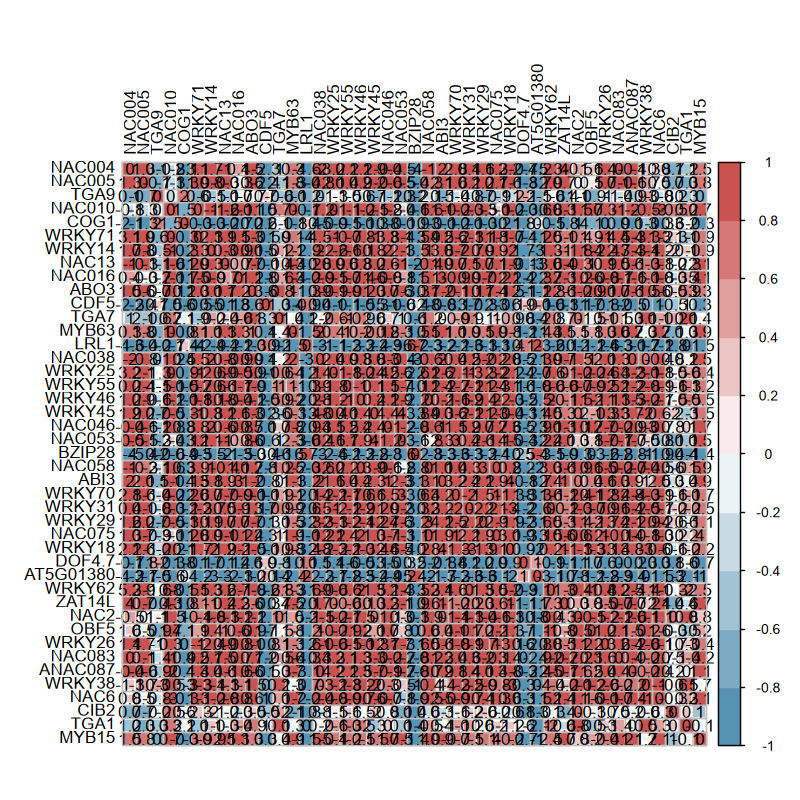

In [102]:
# Start capturing the plot output to a file
pdf("./plots/corrplot_nodes_l2fc_2.pdf", width=14, height=14)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()
corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

#### TF-GO using AME enrichment results

In [103]:
sequences_result_l2f <- sequences_result_ori %>% mutate(TF_traget = seq_ID %>% str_extract('^AT\\dG\\d{5}')) %>% 
    filter(motif_ID != 'NA', class == 'tp') %>% 
    as.data.frame() %>% dplyr::rename(TF = motif_ID) %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% 
    dplyr::rename( TF_log2FoldChange = log2FoldChange )  %>% filter(TF_log2FoldChange %>% abs > 2) %>% 
    left_join(Res_DM1_DM2d, by = c('TF_traget' = 'AGI' )) %>% 
    dplyr::rename(target_log2FoldChange = log2FoldChange) %>% 
    filter(target_log2FoldChange %>% abs > 3)
sequences_result_l2f

motif_DB       TF        motif_ALT_ID
1     plantTFDB.meme AT1G01060 MP00119     
2     plantTFDB.meme AT1G01060 MP00119     
3     plantTFDB.meme AT1G01060 MP00119     
4     plantTFDB.meme AT1G01060 MP00119     
5     plantTFDB.meme AT1G01060 MP00119     
6     plantTFDB.meme AT1G01060 MP00119     
7     plantTFDB.meme AT1G01060 MP00119     
8     plantTFDB.meme AT1G01060 MP00119     
9     plantTFDB.meme AT1G01060 MP00119     
10    plantTFDB.meme AT1G01060 MP00119     
11    plantTFDB.meme AT1G01060 MP00119     
12    plantTFDB.meme AT1G01060 MP00119     
13    plantTFDB.meme AT1G01060 MP00119     
14    plantTFDB.meme AT1G01060 MP00119     
15    plantTFDB.meme AT1G01060 MP00119     
16    plantTFDB.meme AT1G01060 MP00119     
17    plantTFDB.meme AT1G01060 MP00119     
18    plantTFDB.meme AT1G01060 MP00119     
19    plantTFDB.meme AT1G01060 MP00119     
20    plantTFDB.meme AT1G01060 MP00119     
21    plantTFDB.meme AT1G01060 MP00119     
22    plantTFDB.meme AT1G01060 MP00119     
23    plantTFDB.meme AT1G01060 MP00119     
24    plantTFDB.meme AT1G01060 MP00119     
25    plantTFDB.meme AT1G01060 MP00119     
26    plantTFDB.meme AT1G01060 MP00119     
27    plantTFDB.meme AT1G01060 MP00119     
28    plantTFDB.meme AT1G01060 MP00119     
29    plantTFDB.meme AT1G01060 MP00119     
30    plantTFDB.meme AT1G01060 MP00119     
⋮     ⋮              ⋮         ⋮           
61047 plantTFDB.meme AT1G01060 MP00119     
61048 plantTFDB.meme AT1G18330 MP00146     
61049 plantTFDB.meme AT1G24260 MP00605     
61050 plantTFDB.meme AT1G29160 MP00166     
61051 plantTFDB.meme AT1G29160 MP00166     
61052 plantTFDB.meme AT1G69570 MP00223     
61053 plantTFDB.meme AT1G69570 MP00223     
61054 plantTFDB.meme AT1G79180 MP00249     
61055 plantTFDB.meme AT2G18160 MP00267     
61056 plantTFDB.meme AT2G32460 MP00287     
61057 plantTFDB.meme AT3G08500 MP00336     
61058 plantTFDB.meme AT3G09600 MP00338     
61059 plantTFDB.meme AT3G10800 MP00345     
61060 plantTFDB.meme AT3G23250 MP00375     
61061 plantTFDB.meme AT3G45610 MP00392     
61062 plantTFDB.meme AT3G45610 MP00392     
61063 plantTFDB.meme AT3G59060 MP00082     
61064 plantTFDB.meme AT4G18960 MP00609     
61065 plantTFDB.meme AT4G38000 MP00478     
61066 plantTFDB.meme AT4G38000 MP00478     
61067 plantTFDB.meme AT5G17300 MP00515     
61068 plantTFDB.meme AT5G17430 MP00610     
61069 plantTFDB.meme AT5G17430 MP00610     
61070 plantTFDB.meme AT5G20240 MP00080     
61071 plantTFDB.meme AT5G20240 MP00080     
61072 plantTFDB.meme AT5G62940 MP00580     
61073 plantTFDB.meme AT5G62940 MP00580     
61074 plantTFDB.meme AT5G65130 MP00585     
61075 plantTFDB.meme AT5G66940 MP00593     
61076 plantTFDB.meme AT5G66940 MP00593     
      seq_ID                                 FASTA_score PWM_score  class
1     AT5G06690WCRKC1_5_2061850_2062138      3123        123.4030   tp   
2     AT1G17200CASPL2A1_1_5877307_5877507    1888         89.9533   tp   
3     AT4G04330RbcX1_4_2118516_2118720       3064         87.9421   tp   
4     AT4G14740FL3_4_8456170_8456412          330         77.3466   tp   
5     AT5G67390AT5G67390_5_26888597_26888946 1389         50.6486   tp   
6     AT5G47330AT5G47330_5_19206242_19206595 2009         50.0902   tp   
7     AT1G14440HB31_1_4940786_4941164         983         47.6016   tp   
8     AT4G26530FBA5_4_13390549_13391483       977         44.2240   tp   
9     AT2G42540COR15A_2_17712094_17712514    2680         41.9199   tp   
10    AT3G28080UMAMIT47_3_10450229_10450631  1895         36.3273   tp   
11    AT2G37220CP29B_2_15636673_15636931      849         34.7049   tp   
12    AT4G26370AT4G26370_4_13335995_13336527 1878         34.2867   tp   
13    AT2G42530COR15B_2_17709684_17710201    3024         33.9886   tp   
14    AT1G70820AT1G70820_1_26704939_26705491 2659         32.1598   tp   
15    AT2G34640PTAC12_2_14586486_14587107    1013         31.3690   tp   
16    AT4G30650AT4G30650_4_14953777_14954355 2898         31.1744   tp   
17    AT3G13960GRF5_

In [104]:
sequences_result_l2f %>% filter(TF == 'AT3G56400')

motif_DB       TF        motif_ALT_ID
1   plantTFDB.meme AT3G56400 MP00408     
2   plantTFDB.meme AT3G56400 MP00408     
3   plantTFDB.meme AT3G56400 MP00408     
4   plantTFDB.meme AT3G56400 MP00408     
5   plantTFDB.meme AT3G56400 MP00408     
6   plantTFDB.meme AT3G56400 MP00408     
7   plantTFDB.meme AT3G56400 MP00408     
8   plantTFDB.meme AT3G56400 MP00408     
9   plantTFDB.meme AT3G56400 MP00408     
10  plantTFDB.meme AT3G56400 MP00408     
11  plantTFDB.meme AT3G56400 MP00408     
12  plantTFDB.meme AT3G56400 MP00408     
13  plantTFDB.meme AT3G56400 MP00408     
14  plantTFDB.meme AT3G56400 MP00408     
15  plantTFDB.meme AT3G56400 MP00408     
16  plantTFDB.meme AT3G56400 MP00408     
17  plantTFDB.meme AT3G56400 MP00408     
18  plantTFDB.meme AT3G56400 MP00408     
19  plantTFDB.meme AT3G56400 MP00408     
20  plantTFDB.meme AT3G56400 MP00408     
21  plantTFDB.meme AT3G56400 MP00408     
22  plantTFDB.meme AT3G56400 MP00408     
23  plantTFDB.meme AT3G56400 MP00408     
24  plantTFDB.meme AT3G56400 MP00408     
25  plantTFDB.meme AT3G56400 MP00408     
26  plantTFDB.meme AT3G56400 MP00408     
27  plantTFDB.meme AT3G56400 MP00408     
28  plantTFDB.meme AT3G56400 MP00408     
29  plantTFDB.meme AT3G56400 MP00408     
30  plantTFDB.meme AT3G56400 MP00408     
⋮   ⋮              ⋮         ⋮           
115 plantTFDB.meme AT3G56400 MP00408     
116 plantTFDB.meme AT3G56400 MP00408     
117 plantTFDB.meme AT3G56400 MP00408     
118 plantTFDB.meme AT3G56400 MP00408     
119 plantTFDB.meme AT3G56400 MP00408     
120 plantTFDB.meme AT3G56400 MP00408     
121 plantTFDB.meme AT3G56400 MP00408     
122 plantTFDB.meme AT3G56400 MP00408     
123 plantTFDB.meme AT3G56400 MP00408     
124 plantTFDB.meme AT3G56400 MP00408     
125 plantTFDB.meme AT3G56400 MP00408     
126 plantTFDB.meme AT3G56400 MP00408     
127 plantTFDB.meme AT3G56400 MP00408     
128 plantTFDB.meme AT3G56400 MP00408     
129 plantTFDB.meme AT3G56400 MP00408     
130 plantTFDB.meme AT3G56400 MP00408     
131 plantTFDB.meme AT3G56400 MP00408     
132 plantTFDB.meme AT3G56400 MP00408     
133 plantTFDB.meme AT3G56400 MP00408     
134 plantTFDB.meme AT3G56400 MP00408     
135 plantTFDB.meme AT3G56400 MP00408     
136 plantTFDB.meme AT3G56400 MP00408     
137 plantTFDB.meme AT3G56400 MP00408     
138 plantTFDB.meme AT3G56400 MP00408     
139 plantTFDB.meme AT3G56400 MP00408     
140 plantTFDB.meme AT3G56400 MP00408     
141 plantTFDB.meme AT3G56400 MP00408     
142 plantTFDB.meme AT3G56400 MP00408     
143 plantTFDB.meme AT3G56400 MP00408     
144 plantTFDB.meme AT3G56400 MP00408     
    seq_ID                                 FASTA_score PWM_score class
1   AT1G56550RGXT3_1_21187802_21188281     2562        641.3840  tp   
2   AT1G51860AT1G51860_1_19261502_19262193 2203        426.1530  tp   
3   AT2G25460AT2G25460_2_10834248_10834595 1770        418.8630  tp   
4   AT3G49110PRXCA_3_18202470_18202992     2481        280.6600  tp   
5   AT5G62150AT5G62150_5_24958057_24958323  173        129.9680  tp   
6   AT5G25440SZE1_5_8856215_8857099        1865        129.6510  tp   
7   AT5G53120SPDS3_5_21532128_21533018     2092         92.4837  tp   
8   AT2G39518CASPL4D2_2_16497056_16497719   204         78.8974  tp   
9   AT4G37530AT4G37530_4_17632569_17633830 1483         72.4622  tp   
10  AT1G76930EXT4_1_28894958_28895222      1848         70.4173  tp   
11  AT1G21520AT1G21520_1_7535379_7536016   1435         65.3636  tp   
12  AT3G52470AT3G52470_3_19448885_19449537 2116         63.8351  tp   
13  AT1G56060ATHCYSTM3_1_20968148_20970615 1328         53.0329  tp   
14  AT5G62520SRO5_5_25099579_25100267      1109         49.8314  tp   
15  AT3G44720ADT4_3_16271349_16273227      1001         48.5273  tp   
16  AT3G52470AT3G52470_3_19450501_19451361 2117         43.2738  tp   
17  AT1G01480ACS2_1_176738_177521           332         43.2380  tp   
18  AT5G64100PRX69_5_25652790_25653684     2368         40.5579  tp   
19  AT1G45145TRX5_1_17076353_17076694       415    

In [105]:
sequences_result_l2f_distinct <- sequences_result_l2f %>% dplyr::select(TF,TF_log2FoldChange,  TF_traget, enriched_module) %>% distinct()  %>% mutate(TF_module = paste(TF, enriched_module, sep = '_'))
sequences_result_l2f_distinct

TF        TF_log2FoldChange TF_traget enriched_module TF_module         
1     AT1G01060 2.039695          AT5G06690 MEblue          AT1G01060_MEblue  
2     AT1G01060 2.039695          AT1G17200 MEblue          AT1G01060_MEblue  
3     AT1G01060 2.039695          AT4G04330 MEblue          AT1G01060_MEblue  
4     AT1G01060 2.039695          AT4G14740 MEblue          AT1G01060_MEblue  
5     AT1G01060 2.039695          AT5G67390 MEblue          AT1G01060_MEblue  
6     AT1G01060 2.039695          AT5G47330 MEblue          AT1G01060_MEblue  
7     AT1G01060 2.039695          AT1G14440 MEblue          AT1G01060_MEblue  
8     AT1G01060 2.039695          AT4G26530 MEblue          AT1G01060_MEblue  
9     AT1G01060 2.039695          AT2G42540 MEblue          AT1G01060_MEblue  
10    AT1G01060 2.039695          AT3G28080 MEblue          AT1G01060_MEblue  
11    AT1G01060 2.039695          AT2G37220 MEblue          AT1G01060_MEblue  
12    AT1G01060 2.039695          AT4G26370 MEblue          AT1G01060_MEblue  
13    AT1G01060 2.039695          AT2G42530 MEblue          AT1G01060_MEblue  
14    AT1G01060 2.039695          AT1G70820 MEblue          AT1G01060_MEblue  
15    AT1G01060 2.039695          AT2G34640 MEblue          AT1G01060_MEblue  
16    AT1G01060 2.039695          AT4G30650 MEblue          AT1G01060_MEblue  
17    AT1G01060 2.039695          AT3G13960 MEblue          AT1G01060_MEblue  
18    AT1G01060 2.039695          AT3G13000 MEblue          AT1G01060_MEblue  
19    AT1G01060 2.039695          AT5G62720 MEblue          AT1G01060_MEblue  
20    AT1G01060 2.039695          AT5G15970 MEblue          AT1G01060_MEblue  
21    AT1G01060 2.039695          AT2G45560 MEblue          AT1G01060_MEblue  
22    AT1G01060 2.039695          AT1G02205 MEblue          AT1G01060_MEblue  
23    AT1G01060 2.039695          AT5G59130 MEblue          AT1G01060_MEblue  
24    AT1G01060 2.039695          AT1G48350 MEblue          AT1G01060_MEblue  
25    AT1G01060 2.039695          AT2G29630 MEblue          AT1G01060_MEblue  
26    AT1G01060 2.039695          AT1G50280 MEblue          AT1G01060_MEblue  
27    AT1G01060 2.039695          AT3G53800 MEblue          AT1G01060_MEblue  
28    AT1G01060 2.039695          AT5G55620 MEblue          AT1G01060_MEblue  
29    AT1G01060 2.039695          AT5G47240 MEblue          AT1G01060_MEblue  
30    AT1G01060 2.039695          AT2G05790 MEblue          AT1G01060_MEblue  
⋮     ⋮         ⋮                 ⋮         ⋮               ⋮                 
54134 AT5G64750  2.532057         AT3G45010 MEsalmon        AT5G64750_MEsalmon
54135 AT5G65130  4.235627         AT1G65510 MEsalmon        AT5G65130_MEsalmon
54136 AT5G65130  4.235627         AT1G07610 MEsalmon        AT5G65130_MEsalmon
54137 AT5G65130  4.235627         AT3G45010 MEsalmon        AT5G65130_MEsalmon
54138 AT5G65130  4.235627         AT1G35140 MEsalmon        AT5G65130_MEsalmon
54139 AT5G66940 -2.456498         AT1G35140 MEsalmon        AT5G66940_MEsalmon
54140 AT5G66940 -2.456498         AT4G38420 MEsalmon        AT5G66940_MEsalmon
54141 AT5G66940 -2.456498         AT1G65510 MEsalmon        AT5G66940_MEsalmon
54142 AT1G01060  2.039695         AT5G50450 MEtan           AT1G01060_MEtan   
54143 AT1G18330 -2.914736         AT5G50450 MEtan           AT1G18330_MEtan   
54144 AT1G24260 -4.796993         AT5G50450 MEtan           AT1G24260_MEtan   
54145 AT1G29160  3.886698         AT5G50450 MEtan           AT1G29160_MEtan   
54146 AT1G69570  3.598562         AT5G50450 MEtan           AT1G69570_MEtan   
54147 AT1G79180  4.138561         AT5G50450 MEtan           AT1G79180_MEtan   
54148 AT2G18160 -2.527223         AT5G60100 MEtan           AT2G18160_MEtan   
54149 AT2G32460  5.839934         AT5G50450 MEtan           AT2G32460_MEtan   
54150 AT3G08500 -4.270449         AT5G50450 MEtan           AT3G08500_MEtan   
54151 AT3G09600  2.135496         AT5G50450 MEtan           AT3G09600_MEtan   
54152 AT3G10800  2.241787         AT5G60100 MEtan       

In [106]:
library(gprofiler2)

In [107]:
# Split the data frame into a list of named sublists by module
module_lists <- split(sequences_result_l2f_distinct$TF_traget  , sequences_result_l2f_distinct$TF_module)
module_lists %>% str#

List of 598
 $ AT1G01060_MEblue        : chr [1:115] "AT5G06690" "AT1G17200" "AT4G04330" "AT4G14740" ...
 $ AT1G01060_MEcyan        : chr [1:64] "AT1G71000" "AT1G21310" "AT1G58340" "AT5G26920" ...
 $ AT1G01060_MEdarkgreen   : chr [1:4] "AT1G21740" "AT5G54510" "AT1G60890" "AT3G12700"
 $ AT1G01060_MEtan         : chr "AT5G50450"
 $ AT1G01250_MEblue        : chr [1:188] "AT3G21190" "AT4G12730" "AT5G03760" "AT4G29020" ...
 $ AT1G01250_MEcyan        : chr [1:95] "AT1G30700" "AT3G09940" "AT5G48560" "AT2G43150" ...
 $ AT1G01250_MEpurple      : chr [1:7] "AT1G23740" "AT4G16140" "AT1G66130" "AT1G58270" ...
 $ AT1G02230_MEcyan        : chr [1:95] "AT1G67520" "AT2G15830" "AT1G53625" "AT3G47540" ...
 $ AT1G02250_MEblue        : chr [1:26] "AT5G02180" "AT3G42800" "AT5G13630" "AT1G04520" ...
 $ AT1G02250_MEcyan        : chr [1:113] "AT3G26470" "AT1G53625" "AT1G13480" "AT1G06148" ...
 $ AT1G06160_MEblue        : chr [1:90] "AT3G51740" "AT2G43010" "AT5G55570" "AT3G03265" ...
 $ AT1G06160_MEcyan       

In [108]:
TF_l2f2 <- diffTF_AME_WGCNA_modules_L2fold %>% dplyr::filter( TF_class %>% str_detect('activator|repressor')) %>% 
    filter(log2FoldChange_DM1_2d_vs_Col_14 %>% abs > 2) %>% pull('TF')

In [109]:
sequences_result_l2f_distinct <- sequences_result_l2f_distinct %>% filter(TF %in% TF_l2f2)

In [110]:
GOs = gost( module_lists,
      organism = "athaliana", sources = c("GO:BP"), multi_query = FALSE, evcodes = TRUE)

In [115]:
GOs$result ##the query is TF

query            significant p_value      term_size query_size
1    AT1G02230_MEcyan TRUE        1.727182e-06 3930      74        
2    AT1G02230_MEcyan TRUE        1.738073e-06 3114      74        
3    AT1G02230_MEcyan TRUE        2.834876e-06 6380      74        
4    AT1G02230_MEcyan TRUE        4.400672e-06  240      74        
5    AT1G02230_MEcyan TRUE        4.764580e-06  242      74        
6    AT1G02230_MEcyan TRUE        4.764580e-06  242      74        
7    AT1G02230_MEcyan TRUE        1.215898e-05  267      74        
8    AT1G02230_MEcyan TRUE        1.400001e-05  271      74        
9    AT1G02230_MEcyan TRUE        1.449712e-05  272      74        
10   AT1G02230_MEcyan TRUE        3.016270e-05  473      74        
11   AT1G02230_MEcyan TRUE        1.498146e-04 1492      74        
12   AT1G02230_MEcyan TRUE        1.498146e-04 1492      74        
13   AT1G02230_MEcyan TRUE        1.860094e-04 1513      74        
14   AT1G02230_MEcyan TRUE        1.977362e-04 1519      74        
15   AT1G02230_MEcyan TRUE        8.088133e-04 1666      74        
16   AT1G02230_MEcyan TRUE        2.329822e-03 1967      74        
17   AT1G02230_MEcyan TRUE        2.746863e-03 2173      74        
18   AT1G02230_MEcyan TRUE        2.755195e-03  375      74        
19   AT1G02230_MEcyan TRUE        3.188638e-03  285      74        
20   AT1G02230_MEcyan TRUE        3.716794e-03  291      74        
21   AT1G02230_MEcyan TRUE        4.824421e-03 1203      74        
22   AT1G02230_MEcyan TRUE        7.088505e-03 1750      74        
23   AT1G02230_MEcyan TRUE        8.929491e-03   90      74        
24   AT1G02230_MEcyan TRUE        9.424914e-03   91      74        
25   AT1G02230_MEcyan TRUE        9.941543e-03   92      74        
26   AT1G02230_MEcyan TRUE        1.750537e-02  174      74        
27   AT1G02230_MEcyan TRUE        2.110287e-02  268      74        
28   AT1G02230_MEcyan TRUE        2.470108e-02  111      74        
29   AT1G02230_MEcyan TRUE        2.890072e-02   20      74        
30   AT1G02230_MEcyan TRUE        3.052984e-02  284      74        
⋮    ⋮                ⋮           ⋮            ⋮         ⋮         
5293 AT5G66700_MEblue TRUE        3.409344e-03  536      175       
5294 AT5G66700_MEblue TRUE        7.705674e-03  779      175       
5295 AT5G66700_MEblue TRUE        8.668254e-03   38      175       
5296 AT5G66700_MEblue TRUE        8.668254e-03   38      175       
5297 AT5G66700_MEblue TRUE        1.021866e-02  282      175       
5298 AT5G66700_MEblue TRUE        1.118067e-02  800      175       
5299 AT5G66700_MEblue TRUE        1.712460e-02  149      175       
5300 AT5G66700_MEblue TRUE        1.735958e-02  195      175       
5301 AT5G66700_MEblue TRUE        2.425204e-02  699      175       
5302 AT5G67450_MEblue TRUE        2.547705e-11   22       99       
5303 AT5G67450_MEblue TRUE        3.760555e-11   37       99       
5304 AT5G67450_MEblue TRUE        2.538154e-07  282       99       
5305 AT5G67450_MEblue TRUE        8.772300e-07  149       99       
5306 AT5G67450_MEblue TRUE        5.455831e-06  779       99       
5307 AT5G67450_MEblue TRUE        8.233765e-06  800       99       
5308 AT5G67450_MEblue TRUE        1.371066e-05   19       99       
5309 AT5G67450_MEblue TRUE        7.135988e-05  536       99       
5310 AT5G67450_MEblue TRUE        2.030163e-04  584       99       
5311 AT5G67450_MEblue TRUE        2.817542e-04    4       99       
5312 AT5G67450_MEblue TRUE        2.980834e-04  699       99       
5313 AT5G67450_MEblue TRUE        2.442098e-03    7       99       
5314 AT5G67450_MEblue TRUE        4.025097e-03  152       99       
5315 AT5G67450_MEblue TRUE        4.457046e-03  291       99       
5316 AT5G67450_MEblue TRUE        7.704052e-03   64       99       
5317 AT5G67450_MEblue TRUE        8.195065e-03  490       99       
5318 AT5G67450_MEblue TRUE        8.293986e-03   10       99       
5319 AT5G67450_MEblue TRUE        9.658635e-03   67       99 

In [116]:
GOs$result <- GOs$result %>% filter(p_value < 0.01)

In [117]:
gp_mod <- GOs$result[, c("query", "source", "term_id",
                          "term_name", "p_value", "query_size", 
                          "intersection_size", "term_size", 
                          "effective_domain_size", "intersection")]

In [118]:
gp_mod %>% filter(query == 'AT3G56400_MEcyan') 

query            source term_id   
1  AT3G56400_MEcyan GO:BP  GO:0006950
2  AT3G56400_MEcyan GO:BP  GO:0006952
3  AT3G56400_MEcyan GO:BP  GO:0050896
4  AT3G56400_MEcyan GO:BP  GO:0042221
5  AT3G56400_MEcyan GO:BP  GO:0009605
6  AT3G56400_MEcyan GO:BP  GO:0043207
7  AT3G56400_MEcyan GO:BP  GO:0051707
8  AT3G56400_MEcyan GO:BP  GO:0044419
9  AT3G56400_MEcyan GO:BP  GO:0009607
10 AT3G56400_MEcyan GO:BP  GO:0042742
11 AT3G56400_MEcyan GO:BP  GO:0098542
12 AT3G56400_MEcyan GO:BP  GO:0009617
13 AT3G56400_MEcyan GO:BP  GO:0006979
   term_name                                                                
1  response to stress                                                       
2  defense response                                                         
3  response to stimulus                                                     
4  response to chemical                                                     
5  response to external stimulus                                            
6  response to external biotic stimulus                                     
7  response to other organism                                               
8  biological process involved in interspecies interaction between organisms
9  response to biotic stimulus                                              
10 defense response to bacterium                                            
11 defense response to other organism                                       
12 response to bacterium                                                    
13 response to oxidative stress                                             
   p_value      query_size intersection_size term_size effective_domain_size
1  8.717332e-09 105        48                3930      22826                
2  3.684473e-08 105        30                1666      22826                
3  7.238019e-08 105        61                6380      22826                
4  1.447611e-05 105        37                3114      22826                
5  3.509975e-05 105        28                1967      22826                
6  4.299212e-05 105        24                1492      22826                
7  4.299212e-05 105        24                1492      22826                
8  5.589111e-05 105        24                1513      22826                
9  6.018933e-05 105        24                1519      22826                
10 1.273948e-04 105        12                 375      22826                
11 4.039074e-04 105        20                1203      22826                
12 1.478341e-03 105        12                 473      22826                
13 6.562923e-03 105        11                 456      22826                
   intersection                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  AT3G49110,AT5G25440,AT5G53120,AT4G37530,AT1G21520,AT3G52470,AT1G56060,AT5G62520,AT3G44720,AT5G64100,AT1G45145,AT4G11170,AT2G17220,AT3G53480,AT5G24090,AT2G45220,AT5G40780,AT5G46050,AT4G08780,AT2G43570,AT4G12490,AT2G45760,AT1G66090,AT1G80820,AT3G04070,AT1G21550,AT2G13810,AT1G02360,AT2G14560,AT1G33560,AT4G19520,AT3G04720,AT3G49210,AT3G11340,AT4G23210,AT1G35910,AT5G44380,AT3G61190,AT1G30720,AT1G06160,AT5G22540,AT2G47130,AT3G13610,AT3G28510,AT5G13320,AT1G14870,AT3G13790,AT5G45380                                                                                                                                  
2  AT3G49110,AT5G25440,AT5G53120,AT3G52470,AT3G44720,AT1G45145,AT4G11170,AT2G17220,AT5G24

In [119]:
library(compEpiTools)

Loading required package: topGO

Loading required package: graph


Attaching package: ‘graph’


The following object is masked from ‘package:stringr’:

    boundary


Loading required package: GO.db

Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve



groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Attaching package: ‘topGO’


The following object is masked from ‘package:GenomicFeatures’:

    genes


The following object is masked from ‘package:IRanges’:

    members




In [120]:
gp_mod %>% filter(query == 'AT3G56400_MEcyan') %>% pull('term_id')

[1] "GO:0006950" "GO:0006952" "GO:0050896" "GO:0042221" "GO:0009605"
 [6] "GO:0043207" "GO:0051707" "GO:0044419" "GO:0009607" "GO:0042742"
[11] "GO:0098542" "GO:0009617" "GO:0006979"

In [121]:
gp_mod %>% filter(query == 'AT4G38000_MEblue') %>%nrow
gp_mod %>% filter(query == 'AT4G38000_MEblue')

[1] 39

query            source term_id   
1  AT4G38000_MEblue GO:BP  GO:0015979
2  AT4G38000_MEblue GO:BP  GO:0019684
3  AT4G38000_MEblue GO:BP  GO:0009765
4  AT4G38000_MEblue GO:BP  GO:0009768
5  AT4G38000_MEblue GO:BP  GO:0006091
6  AT4G38000_MEblue GO:BP  GO:0009416
7  AT4G38000_MEblue GO:BP  GO:0009314
8  AT4G38000_MEblue GO:BP  GO:0009628
9  AT4G38000_MEblue GO:BP  GO:0071555
10 AT4G38000_MEblue GO:BP  GO:0045229
11 AT4G38000_MEblue GO:BP  GO:0071554
12 AT4G38000_MEblue GO:BP  GO:0005975
13 AT4G38000_MEblue GO:BP  GO:0009767
14 AT4G38000_MEblue GO:BP  GO:0015977
15 AT4G38000_MEblue GO:BP  GO:0009725
16 AT4G38000_MEblue GO:BP  GO:0110102
17 AT4G38000_MEblue GO:BP  GO:0009719
18 AT4G38000_MEblue GO:BP  GO:0009642
19 AT4G38000_MEblue GO:BP  GO:0009987
20 AT4G38000_MEblue GO:BP  GO:0006949
21 AT4G38000_MEblue GO:BP  GO:0009645
22 AT4G38000_MEblue GO:BP  GO:0007018
23 AT4G38000_MEblue GO:BP  GO:0010033
24 AT4G38000_MEblue GO:BP  GO:0019253
25 AT4G38000_MEblue GO:BP  GO:0019685
26 AT4G38000_MEblue GO:BP  GO:0009769
27 AT4G38000_MEblue GO:BP  GO:0009409
28 AT4G38000_MEblue GO:BP  GO:0016043
29 AT4G38000_MEblue GO:BP  GO:0009773
30 AT4G38000_MEblue GO:BP  GO:0009644
31 AT4G38000_MEblue GO:BP  GO:0006833
32 AT4G38000_MEblue GO:BP  GO:0042044
33 AT4G38000_MEblue GO:BP  GO:0022900
34 AT4G38000_MEblue GO:BP  GO:0010206
35 AT4G38000_MEblue GO:BP  GO:0033993
36 AT4G38000_MEblue GO:BP  GO:0008152
37 AT4G38000_MEblue GO:BP  GO:0050896
38 AT4G38000_MEblue GO:BP  GO:1901700
39 AT4G38000_MEblue GO:BP  GO:0042221
   term_name                                          p_value      query_size
1  photosynthesis                                     2.156863e-34 495       
2  photosynthesis, light reaction                     6.649164e-20 495       
3  photosynthesis, light harvesting                   3.763775e-16 495       
4  photosynthesis, light harvesting in photosystem I  4.495389e-12 495       
5  generation of precursor metabolites and energy     3.327016e-11 495       
6  response to light stimulus                         4.651483e-11 495       
7  response to radiation                              1.360576e-10 495       
8  response to abiotic stimulus                       6.062176e-10 495       
9  cell wall organization                             1.116039e-08 495       
10 external encapsulating structure organization      4.114363e-08 495       
11 cell wall organization or biogenesis               2.629755e-07 495       
12 carbohydrate metabolic process                     2.828500e-07 495       
13 photosynthetic electron transport chain            1.269711e-06 495       
14 carbon fixation                                    2.917789e-06 495       
15 response to hormone                                1.460265e-05 495       
16 ribulose bisphosphate carboxylase complex assembly 1.757692e-05 495       
17 response to endogenous stimulus                    2.927646e-05 495       
18 response to light intensity                        3.270463e-05 495       
19 cellular process                                   4.975047e-05 495       
20 syncytium formation                                7.452797e-05 495       
21 response to low light intensity stimulus           7.761257e-05 495       
22 microtubule-based movement                         8.877738e-05 495       
23 response to organic substance                      1.079823e-04 495       
24 reductive pentose-phosphate cycle                  1.724878e-04 495       
25 photosynthesis, dark reaction                      1.724878e-04 495       
26 photosynthesis, light harvesting in photosystem II 1.951287e-04 495       
27 response to cold                                   3.129184e-04 495       
28 cellular component organization                    5.103884e-04 495       
29 photosynthetic electron transport in photosystem I 5.998660e-04 495       
30 response to high light intensity                   9.953696e-04 495       
31 water transport                                    1.139158e-0

In [122]:
gp_mod %>% filter(query == 'AT4G38000_MEcyan') %>%nrow
gp_mod %>% filter(query == 'AT4G38000_MEcyan')

[1] 94

query            source term_id   
1  AT4G38000_MEcyan GO:BP  GO:0050896
2  AT4G38000_MEcyan GO:BP  GO:0006950
3  AT4G38000_MEcyan GO:BP  GO:0042221
4  AT4G38000_MEcyan GO:BP  GO:0043207
5  AT4G38000_MEcyan GO:BP  GO:0051707
6  AT4G38000_MEcyan GO:BP  GO:0009605
7  AT4G38000_MEcyan GO:BP  GO:0044419
8  AT4G38000_MEcyan GO:BP  GO:0009607
9  AT4G38000_MEcyan GO:BP  GO:0006952
10 AT4G38000_MEcyan GO:BP  GO:0009617
11 AT4G38000_MEcyan GO:BP  GO:0098542
12 AT4G38000_MEcyan GO:BP  GO:0010033
13 AT4G38000_MEcyan GO:BP  GO:0042742
14 AT4G38000_MEcyan GO:BP  GO:1901700
15 AT4G38000_MEcyan GO:BP  GO:0001666
16 AT4G38000_MEcyan GO:BP  GO:0071456
17 AT4G38000_MEcyan GO:BP  GO:0051716
18 AT4G38000_MEcyan GO:BP  GO:0036293
19 AT4G38000_MEcyan GO:BP  GO:0071453
20 AT4G38000_MEcyan GO:BP  GO:0036294
21 AT4G38000_MEcyan GO:BP  GO:0070482
22 AT4G38000_MEcyan GO:BP  GO:0070887
23 AT4G38000_MEcyan GO:BP  GO:0009620
24 AT4G38000_MEcyan GO:BP  GO:0009627
25 AT4G38000_MEcyan GO:BP  GO:0009628
26 AT4G38000_MEcyan GO:BP  GO:0006979
27 AT4G38000_MEcyan GO:BP  GO:0009719
28 AT4G38000_MEcyan GO:BP  GO:0009725
29 AT4G38000_MEcyan GO:BP  GO:0006970
30 AT4G38000_MEcyan GO:BP  GO:0006955
⋮  ⋮                ⋮      ⋮         
65 AT4G38000_MEcyan GO:BP  GO:0051702
66 AT4G38000_MEcyan GO:BP  GO:0044248
67 AT4G38000_MEcyan GO:BP  GO:0097305
68 AT4G38000_MEcyan GO:BP  GO:0014070
69 AT4G38000_MEcyan GO:BP  GO:0009415
70 AT4G38000_MEcyan GO:BP  GO:0002253
71 AT4G38000_MEcyan GO:BP  GO:0008219
72 AT4G38000_MEcyan GO:BP  GO:0002682
73 AT4G38000_MEcyan GO:BP  GO:0050776
74 AT4G38000_MEcyan GO:BP  GO:0009862
75 AT4G38000_MEcyan GO:BP  GO:0002757
76 AT4G38000_MEcyan GO:BP  GO:0002764
77 AT4G38000_MEcyan GO:BP  GO:0019748
78 AT4G38000_MEcyan GO:BP  GO:0009414
79 AT4G38000_MEcyan GO:BP  GO:2000022
80 AT4G38000_MEcyan GO:BP  GO:0006032
81 AT4G38000_MEcyan GO:BP  GO:0046348
82 AT4G38000_MEcyan GO:BP  GO:1901072
83 AT4G38000_MEcyan GO:BP  GO:0006030
84 AT4G38000_MEcyan GO:BP  GO:0006026
85 AT4G38000_MEcyan GO:BP  GO:0044403
86 AT4G38000_MEcyan GO:BP  GO:0045088
87 AT4G38000_MEcyan GO:BP  GO:0010120
88 AT4G38000_MEcyan GO:BP  GO:0052317
89 AT4G38000_MEcyan GO:BP  GO:0009737
90 AT4G38000_MEcyan GO:BP  GO:0009403
91 AT4G38000_MEcyan GO:BP  GO:0009700
92 AT4G38000_MEcyan GO:BP  GO:0052314
93 AT4G38000_MEcyan GO:BP  GO:0052315
94 AT4G38000_MEcyan GO:BP  GO:0046217
   term_name                                                                
1  response to stimulus                                                     
2  response to stress                                                       
3  response to chemical                                                     
4  response to external biotic stimulus                                     
5  response to other organism                                               
6  response to external stimulus                                            
7  biological process involved in interspecies interaction between organisms
8  response to biotic stimulus                                              
9  defense response                                                         
10 response to bacterium                                                    
11 defense response to other organism                                       
12 response to organic substance                                            
13 defense response to bacterium                                            
14 response to oxygen-containing compound                                   
15 response to hypoxia                                                      
16 cellular response to hypoxia                                             
17 cellular response to stimulus                                            
18 response to decreased oxygen levels                                      
19 cellular response to oxygen levels                                       
20 cellular response to decreased oxygen levels                             
21 response to oxygen levels  

In [123]:
gp_mod %>% filter(query == 'AT5G03510_MEblue') %>%nrow
gp_mod %>% filter(query == 'AT5G03510_MEblue')

[1] 0

query source term_id term_name p_value query_size intersection_size
     term_size effective_domain_size intersection

In [124]:
gp_mod %>% filter(query == 'AT3G04060_MEcyan') %>%nrow
gp_mod %>% filter(query == 'AT3G04060_MEcyan')

[1] 7

query            source term_id   
1 AT3G04060_MEcyan GO:BP  GO:0050896
2 AT3G04060_MEcyan GO:BP  GO:0043207
3 AT3G04060_MEcyan GO:BP  GO:0051707
4 AT3G04060_MEcyan GO:BP  GO:0044419
5 AT3G04060_MEcyan GO:BP  GO:0009607
6 AT3G04060_MEcyan GO:BP  GO:0006950
7 AT3G04060_MEcyan GO:BP  GO:0009605
  term_name                                                                
1 response to stimulus                                                     
2 response to external biotic stimulus                                     
3 response to other organism                                               
4 biological process involved in interspecies interaction between organisms
5 response to biotic stimulus                                              
6 response to stress                                                       
7 response to external stimulus                                            
  p_value      query_size intersection_size term_size effective_domain_size
1 2.834876e-06 74         45                6380      22826                
2 1.498146e-04 74         19                1492      22826                
3 1.498146e-04 74         19                1492      22826                
4 1.860094e-04 74         19                1513      22826                
5 1.977362e-04 74         19                1519      22826                
6 4.301372e-04 74         31                3930      22826                
7 2.329822e-03 74         20                1967      22826                
  intersection                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 AT4G23210,AT1G48000,AT4G30280,AT3G28510,AT1G26410,AT2G04070,AT2G29350,AT4G04490,AT3G17690,AT4G23150,AT3G26470,AT5G43580,AT2G45220,AT5G57510,AT1G55020,AT4G11890,AT4G19230,AT3G53160,AT5G25440,AT4G34131,AT1G68820,AT4G32810,AT1G57630,AT4G25000,AT3G01290,AT4G23260,AT2G27690,AT2G30250,AT1G70690,AT5G13080,AT2G43000,AT5G48410,AT4G35380,AT5G50760,AT5G39050,AT2G43570,AT2G18700,AT4G08950,AT3G22600,AT1G65690,AT2G39350,AT5G44990,AT5G59820,AT1G56060,AT5G39670
2 AT4G23210,AT2G29350,AT3G17690,AT4G23150,AT3G26470,AT5G43580,AT2G45220,AT4G11890,AT4G19230,AT3G53160,AT5G25440,AT4G34131,AT3G01290,AT4G23260,AT1G70690,AT2G43570,AT3G22600,AT2G39350,AT5G39670                                                                                                                                                                                                                                                                    
3 AT4G23210,AT2G29350,AT3G17690,AT4G23150,AT3G26470,AT5G43580,AT2G45220,AT4G11890,AT4G19230,AT3G53160,AT5G25440,AT4G34131,AT3G01290,AT4G23260,AT1G70690,AT2G43570,AT3G22600,AT2G39350,AT5G39670                                                                                                                                                                                                                                                                    
4 AT4G23210,AT2G29350,AT3G17690,AT4G23150,AT3G26470,AT5G43580,AT2G45220,AT4G11890,AT4G19230,AT3G53160,AT5G25440,AT4G34131,AT3G01290,AT4G23260,AT1G70690,AT2G43570,AT3G22600,AT2G39350,AT5G39670                                                                                                                                                                                                                                                                    
5 AT4G23210,AT2G29350,AT3G17690,AT4G23150,AT3G26470,AT5G43580,AT2G45220,AT4G11890,AT4G19230,AT3G53160,AT5G25440,AT4G34131,AT3G01290,AT4G23260,AT1G70690,AT2G43570,AT3G22600,AT2G39350,AT5G39670                                       

In [125]:
gp_mod_l2f <- gp_mod %>% mutate(TF = query %>% str_extract('^AT\\dG\\d{5}'), module = query %>% str_extract('ME\\w+$')) %>% 
    left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% dplyr::rename( TF_log2FoldChange = log2FoldChange ) 

In [126]:
gp_mod_l2f$term_name %>% unique %>% length

[1] 228

In [127]:
node_TF <- gp_mod_l2f %>% dplyr::select(TF, TF_log2FoldChange) %>% distinct %>% 
    dplyr::rename(ID = TF,  log2FoldChange = TF_log2FoldChange) %>% left_join(map_id_name, by = c('ID' = 'gene_id')) %>%
    dplyr::rename(label = gene_name) %>% distinct %>% mutate(type = 'TF')
node_TF

ID        log2FoldChange label     type
1   AT1G02230  5.802775      NAC004    TF  
2   AT1G02250  6.236384      NAC005    TF  
3   AT1G06160 -4.949796      ORA59     TF  
4   AT1G08320  5.438124      TGA9      TF  
5   AT1G12260 -3.704851      NAC007    TF  
6   AT1G19040 -4.799020      AT1G19040 TF  
7   AT1G21910  3.883857      DREB26    TF  
8   AT1G24260 -4.796993      SEP3      TF  
9   AT1G28160  3.280931      AT1G28160 TF  
10  AT1G28470  3.097607      NAC010    TF  
11  AT1G29160  3.886698      COG1      TF  
12  AT1G34180  4.725926      NAC016    TF  
13  AT1G34670  5.747466      MYB93     TF  
14  AT1G36060  3.844047      TG        TF  
15  AT1G49010 -3.172685      MYBS1     TF  
16  AT1G52890  4.161475      NAC019    TF  
17  AT1G54330 -5.963578      NAC020    TF  
18  AT1G62300  3.279617      WRKY6     TF  
19  AT1G65910 -4.106136      NAC028    TF  
20  AT1G66600  6.216629      ABO3      TF  
21  AT1G69120 -6.139123      AP1       TF  
22  AT1G69490  6.205100      NAP       TF  
23  AT1G69570  3.598562      CDF5      TF  
24  AT1G71930 -4.507905      VND7      TF  
25  AT1G74650 -3.410190      MYB31     TF  
26  AT1G76420 -3.738405      CUC3      TF  
27  AT1G77200 -4.541328      AT1G77200 TF  
28  AT1G77640  5.117836      AT1G77640 TF  
29  AT1G77920  3.765220      TGA7      TF  
30  AT1G79180  4.138561      MYB63     TF  
⋮   ⋮         ⋮              ⋮         ⋮   
72  AT4G32800 -3.301053      ERF043    TF  
73  AT4G38000  3.219088      DOF4.7    TF  
74  AT5G01380  4.570795      AT5G01380 TF  
75  AT5G01900  8.419343      WRKY62    TF  
76  AT5G04390  3.379464      ZAT14L    TF  
77  AT5G06839  4.635365      TGA10     TF  
78  AT5G13080  7.134244      WRKY75    TF  
79  AT5G13180  3.228569      NAC083    TF  
80  AT5G18090 -3.413296      AT5G18090 TF  
81  AT5G18270  7.930116      ANAC087   TF  
82  AT5G22570  9.091248      WRKY38    TF  
83  AT5G25390 -8.001517      SHN3      TF  
84  AT5G25810 -6.670440      tny       TF  
85  AT5G26170  4.084713      WRKY50    TF  
86  AT5G39610  3.351094      NAC6      TF  
87  AT5G41570  4.932180      WRKY24    TF  
88  AT5G46350  6.458005      WRKY8     TF  
89  AT5G46830 -8.337382      NIG1      TF  
90  AT5G48560  3.042848      CIB2      TF  
91  AT5G49330 -6.098747      MYB111    TF  
92  AT5G54230  6.240562      MYB49     TF  
93  AT5G56840 -4.820887      AT5G56840 TF  
94  AT5G60130 -4.039435      AT5G60130 TF  
95  AT5G61620  3.653069      AT5G61620 TF  
96  AT5G62380 -4.665501      NAC101    TF  
97  AT5G65130  4.235627      ERF57     TF  
98  AT5G65210  3.391054      TGA1      TF  
99  AT5G66300 -3.350675      NAC105    TF  
100 AT5G66700  4.463753      HB53      TF  
101 AT5G67450  3.177896      ZF1       TF

In [128]:
term_node <- gp_mod_l2f %>% dplyr::select(term_id, term_name, module) %>% distinct %>% dplyr::rename(ID = term_id, label = term_name) %>% mutate(type = 'term')

In [129]:
module_node <- gp_mod_l2f %>% dplyr::select(module) %>% distinct %>% 
    dplyr::rename(ID = module) %>% mutate(label = ID) %>% mutate(type = 'module')

In [130]:
combine_data_frames <- function(df_list) {
  # Get all unique column names across all data frames
  all_col_names <- unique(unlist(lapply(df_list, names)))

  # Add missing columns to each data frame
  df_list <- lapply(df_list, function(df) {
    missing_cols <- setdiff(all_col_names, names(df))
    df[missing_cols] <- NA
    return(df)
  })

  # Ensure the same column order for all data frames
  df_list <- lapply(df_list, function(df) df[all_col_names])

  # Combine all data frames
  combined_df <- do.call(rbind, df_list)
  return(combined_df)
}

# Usage example
# Assuming df1, df2, df3 are your data frames
node_combined <- combine_data_frames(list(node_TF, term_node, module_node))
node_combined


ID             log2FoldChange
1   AT1G02230       5.802775     
2   AT1G02250       6.236384     
3   AT1G06160      -4.949796     
4   AT1G08320       5.438124     
5   AT1G12260      -3.704851     
6   AT1G19040      -4.799020     
7   AT1G21910       3.883857     
8   AT1G24260      -4.796993     
9   AT1G28160       3.280931     
10  AT1G28470       3.097607     
11  AT1G29160       3.886698     
12  AT1G34180       4.725926     
13  AT1G34670       5.747466     
14  AT1G36060       3.844047     
15  AT1G49010      -3.172685     
16  AT1G52890       4.161475     
17  AT1G54330      -5.963578     
18  AT1G62300       3.279617     
19  AT1G65910      -4.106136     
20  AT1G66600       6.216629     
21  AT1G69120      -6.139123     
22  AT1G69490       6.205100     
23  AT1G69570       3.598562     
24  AT1G71930      -4.507905     
25  AT1G74650      -3.410190     
26  AT1G76420      -3.738405     
27  AT1G77200      -4.541328     
28  AT1G77640       5.117836     
29  AT1G77920       3.765220     
30  AT1G79180       4.138561     
⋮   ⋮              ⋮             
322 GO:0048646     NA            
323 GO:0060866     NA            
324 GO:0046395     NA            
325 GO:0016054     NA            
326 GO:0031407     NA            
327 GO:1901615     NA            
328 GO:0044255     NA            
329 GO:0019748     NA            
330 GO:1901136     NA            
331 GO:0006040     NA            
332 GO:0033993     NA            
333 GO:0007165     NA            
334 GO:0023052     NA            
335 GO:0002253     NA            
336 GO:0050826     NA            
337 GO:0009699     NA            
338 GO:0009751     NA            
339 GO:0014070     NA            
340 GO:0016998     NA            
341 GO:0051176     NA            
342 GO:0044550     NA            
343 GO:0030091     NA            
344 GO:1990066     NA            
345 GO:0010196     NA            
346 GO:0071669     NA            
347 MEcyan         NA            
348 MEblue         NA            
349 MEdarkred      NA            
350 MEpurple       NA            
351 MEmidnightblue NA            
    label                                                    type  
1   NAC004                                                   TF    
2   NAC005                                                   TF    
3   ORA59                                                    TF    
4   TGA9                                                     TF    
5   NAC007                                                   TF    
6   AT1G19040                                                TF    
7   DREB26                                                   TF    
8   SEP3                                                     TF    
9   AT1G28160                                                TF    
10  NAC010                                                   TF    
11  COG1                                                     TF    
12  NAC016                                                   TF    
13  MYB93                                                    TF    
14  TG                                                       TF    
15  MYBS1                                                    TF    
16  NAC019                                                   TF    
17  NAC020                                                   TF    
18  WRKY6                                                    TF    
19  NAC028                                                   TF    
20  ABO3                                                     TF    
21  AP1                                                      TF    
22  NAP                                                      TF    
23  CDF5                                                     TF    
24  VND7                                                     TF    
25  MYB31                                                    TF    
26  CUC3                                                     TF    
27  AT1G77200                                               

In [131]:
edges_TF_term <- gp_mod_l2f %>% dplyr::select(TF, term_id) %>% distinct %>%
    dplyr::rename(source = TF, target = term_id) %>% mutate(interaction = 'TF_term')
edges_TF_term %>% head(2)
edges_term_module <- gp_mod_l2f %>% dplyr::select(term_id, module) %>% distinct %>%
    dplyr::rename(source = term_id, target = module) %>% mutate(interaction = 'term_module')

source    target     interaction
1 AT1G02230 GO:0006950 TF_term    
2 AT1G02230 GO:0042221 TF_term

In [132]:
combined_edges <- combine_data_frames(list(edges_TF_term, edges_term_module))
combined_edges

source     target         interaction
1    AT1G02230  GO:0006950     TF_term    
2    AT1G02230  GO:0042221     TF_term    
3    AT1G02230  GO:0050896     TF_term    
4    AT1G02230  GO:0071456     TF_term    
5    AT1G02230  GO:0036294     TF_term    
6    AT1G02230  GO:0071453     TF_term    
7    AT1G02230  GO:0001666     TF_term    
8    AT1G02230  GO:0036293     TF_term    
9    AT1G02230  GO:0070482     TF_term    
10   AT1G02230  GO:0009617     TF_term    
11   AT1G02230  GO:0043207     TF_term    
12   AT1G02230  GO:0051707     TF_term    
13   AT1G02230  GO:0044419     TF_term    
14   AT1G02230  GO:0009607     TF_term    
15   AT1G02230  GO:0006952     TF_term    
16   AT1G02230  GO:0009605     TF_term    
17   AT1G02230  GO:0009628     TF_term    
18   AT1G02230  GO:0042742     TF_term    
19   AT1G02230  GO:0006955     TF_term    
20   AT1G02230  GO:0002376     TF_term    
21   AT1G02230  GO:0098542     TF_term    
22   AT1G02230  GO:1901700     TF_term    
23   AT1G02230  GO:0009626     TF_term    
24   AT1G02230  GO:0034050     TF_term    
25   AT1G02230  GO:0051702     TF_term    
26   AT1G02250  GO:0015979     TF_term    
27   AT1G02250  GO:0019253     TF_term    
28   AT1G02250  GO:0019685     TF_term    
29   AT1G02250  GO:0015977     TF_term    
30   AT1G02250  GO:0006950     TF_term    
⋮    ⋮          ⋮              ⋮          
4108 GO:0009657 MEblue         term_module
4109 GO:0008152 MEblue         term_module
4110 GO:0009658 MEblue         term_module
4111 GO:0007017 MEblue         term_module
4112 GO:0016052 MEblue         term_module
4113 GO:0048646 MEblue         term_module
4114 GO:0060866 MEcyan         term_module
4115 GO:0046395 MEcyan         term_module
4116 GO:0016054 MEcyan         term_module
4117 GO:0031407 MEcyan         term_module
4118 GO:1901615 MEcyan         term_module
4119 GO:0044255 MEcyan         term_module
4120 GO:0019748 MEblue         term_module
4121 GO:1901136 MEcyan         term_module
4122 GO:0006040 MEcyan         term_module
4123 GO:0033993 MEblue         term_module
4124 GO:0007165 MEcyan         term_module
4125 GO:0023052 MEcyan         term_module
4126 GO:0002253 MEcyan         term_module
4127 GO:0050826 MEpurple       term_module
4128 GO:0009699 MEcyan         term_module
4129 GO:0009751 MEmidnightblue term_module
4130 GO:0014070 MEmidnightblue term_module
4131 GO:0016998 MEcyan         term_module
4132 GO:0051176 MEcyan         term_module
4133 GO:0044550 MEcyan         term_module
4134 GO:0030091 MEblue         term_module
4135 GO:1990066 MEblue         term_module
4136 GO:0010196 MEblue         term_module
4137 GO:0071669 MEblue         term_module

In [133]:
node_combined %>% write.csv('TF_GO_module/node_combined.csv', row.names = FALSE, quote = FALSE)
combined_edges %>% write.csv('TF_GO_module/combined_edges.csv', row.names = FALSE, quote = FALSE)

### use clusterProfiler for TF_GO_module

In [134]:
library(clusterProfiler)
library(org.At.tair.db)
library(parallel)  # for parallel processing

clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:IRanges':

    slice


The following object is masked from 'package:S4Vectors':

    rename


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:stats':

    filter






In [135]:
enrich_func <- function(genes) {
  enrichGO(gene = genes,
           OrgDb = org.At.tair.db,
           keyType = "TAIR",
           ont = "BP",
           pAdjustMethod = "BH",
           qvalueCutoff = 0.05)
}

# Perform enrichment analysis in parallel (adjust mc.cores according to your system)
ego_list <- mclapply(module_lists, enrich_func, mc.cores = 20)

In [136]:
names(ego_list) <- names(module_lists)

In [137]:
# Function to apply simplify with different cutoffs
simplify_ego_list <- function(ego_list, cutoff) {
  lapply(ego_list, function(ego) {
    if (!is.null(ego)) simplify(ego, cutoff = cutoff)
    else NULL
  })
}

# Example usage
simplified_ego_list <- simplify_ego_list(ego_list, cutoff = 0.1)

In [138]:
convert_to_dataframe <- function(ego_list) {
  # Initialize an empty dataframe
  combined_df <- data.frame()

  # Loop through each list element
  for (name in names(ego_list)) {
    ego <- ego_list[[name]]
    if (!is.null(ego)) {
      # Convert enrichResult to dataframe
      df <- as.data.frame(ego)
      # Check if df is not empty
      if (nrow(df) > 0) {
        # Add the source (name) as a new column
        df$Source <- name
        # Combine with the overall dataframe
        combined_df <- rbind(combined_df, df)
      }
    }
  }

  return(combined_df)
}

# Convert your simplified_ego_list to a dataframe
simply_GO <- convert_to_dataframe(simplified_ego_list)
simply_GO <- simply_GO  %>% mutate(TF = Source %>% str_extract('^AT\\dG\\d{5}'), module = Source %>% str_extract('ME\\w+$')) %>% 
    left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% dplyr::rename( TF_log2FoldChange = log2FoldChange ) %>%
    mutate(Description = Description %>% str_replace_all(',', '')) ##photosynthesis, light reaction will become two column
simply_GO

ID         Description                                         GeneRatio
1    GO:0019684 photosynthesis light reaction                       9/110    
2    GO:0009627 systemic acquired resistance                        7/62     
3    GO:0046854 phosphatidylinositol phosphate biosynthetic process 1/4      
4    GO:0006661 phosphatidylinositol biosynthetic process           1/4      
5    GO:0009744 response to sucrose                                 1/4      
6    GO:0034285 response to disaccharide                            1/4      
7    GO:0046488 phosphatidylinositol metabolic process              1/4      
8    GO:0009734 auxin-activated signaling pathway                   1/4      
9    GO:0046474 glycerophospholipid biosynthetic process            1/4      
10   GO:0071365 cellular response to auxin stimulus                 1/4      
11   GO:0045017 glycerolipid biosynthetic process                   1/4      
12   GO:0006650 glycerophospholipid metabolic process               1/4      
13   GO:0008654 phospholipid biosynthetic process                   1/4      
14   GO:0007623 circadian rhythm                                    1/4      
15   GO:0048511 rhythmic process                                    1/4      
16   GO:1901605 alpha-amino acid metabolic process                  1/1      
17   GO:0019684 photosynthesis light reaction                       15/184   
18   GO:0015995 chlorophyll biosynthetic process                    12/184   
19   GO:0001666 response to hypoxia                                 13/94    
20   GO:0036293 response to decreased oxygen levels                 13/94    
21   GO:0070482 response to oxygen levels                           13/94    
22   GO:0010150 leaf senescence                                     10/94    
23   GO:0009637 response to blue light                              2/7      
24   GO:0046148 pigment biosynthetic process                        2/7      
25   GO:0009704 de-etiolation                                       1/7      
26   GO:0042440 pigment metabolic process                           2/7      
27   GO:0009959 negative gravitropism                               1/7      
28   GO:0051553 flavone biosynthetic process                        1/7      
29   GO:0051555 flavonol biosynthetic process                       1/7      
30   GO:0051552 flavone metabolic process                           1/7      
⋮    ⋮          ⋮                                                   ⋮        
2028 GO:0009751 response to salicylic acid                          3/9      
2029 GO:0015766 disaccharide transport                              1/9      
2030 GO:0015770 sucrose transport                                   1/9      
2031 GO:0015772 oligosaccharide transport                           1/9      
2032 GO:0016054 organic acid catabolic process                      2/10     
2033 GO:0046395 carboxylic acid catabolic process                   2/10     
2034 GO:0044282 small molecule catabolic process                    2/10     
2035 GO:0046700 heterocycle catabolic process                       2/10     
2036 GO:0046365 monosaccharide catabolic process                    1/10     
2037 GO:1901001 negative regulation of response to salt stress      1/10     
2038 GO:0050688 regulation of defense response to virus             1/10     
2039 GO:0006544 glycine metabolic process                           1/10     
2040 GO:0009071 serine family amino acid catabolic process          1/10     
2041 GO:1901361 organic cyclic compound catabolic process           2/10     
2042 GO:0008643 carbohydrate transport                              1/10     
2043 GO:0071456 cellular response to hypoxia                        1/3      
2044 GO:0036294 cellular response to decreased oxygen levels        1/3      
2045 GO:0071453 cellular response to oxygen levels                  1/3      
2046 GO:0001666 response to hypoxia                                 1/3      
2047 GO:0036293 response to

In [139]:
simply_GO <- simply_GO %>% filter(TF %in% c("AT1G02230", "AT1G02250", "AT1G08320", "AT1G12260", "AT1G28470", "AT1G29160", "AT1G29860", "AT1G30650", "AT1G32870", "AT1G34180", "AT1G65910", "AT1G66600", "AT1G69570", "AT1G71930", "AT1G77920", "AT1G79180", "AT2G18060", "AT2G24260", "AT2G24430", "AT2G27300", "AT2G30250", "AT2G40740", "AT2G43010", "AT2G45420", "AT2G46400", "AT3G01970", "AT3G04060", "AT3G10500", "AT3G10800", "AT3G17730", "AT3G18400", "AT3G23250", "AT3G45610", "AT3G56400", "AT3G57600", "AT4G00050", "AT4G14770", "AT4G22070", "AT4G23550", "AT4G28500", "AT4G29230", "AT4G31800", "AT4G36160", "AT4G38000", "AT5G01380", "AT5G01900", "AT5G04390", "AT5G04410", "AT5G06960", "AT5G07100", "AT5G13180", "AT5G18270", "AT5G22570", "AT5G39610", "AT5G40330", "AT5G48560", "AT5G49330", "AT5G62380", "AT5G62940", "AT5G65210", "AT5G66300", "AT5G66940")) %>% filter( module %in% c("MEblue", "MEcyan", "MEdarkred", "MEdarkturquoise", "MEmidnightblue", "MEpurple", "MEtan"))

In [140]:
simply_GO %>% filter(Description %>% str_detect('grow'))

ID Description GeneRatio BgRatio pvalue p.adjust qvalue geneID Count
     Source TF module TF_log2FoldChange

In [141]:
node_TF <- simply_GO %>% dplyr::select(TF, TF_log2FoldChange) %>% distinct %>% 
    dplyr::rename(ID = TF,  log2FoldChange = TF_log2FoldChange) %>% left_join(map_id_name, by = c('ID' = 'gene_id')) %>%
    dplyr::rename(label = gene_name) %>% distinct %>% mutate(type = 'TF')
node_TF <- node_TF  %>% left_join(diffTF_AME_WGCNA_modules %>% dplyr::select(TF, TF_class, enriched_module, Family), by = c('ID' = 'TF')) %>% mutate(node_color = TF_class)

In [142]:
term_node <- simply_GO %>% dplyr::select(ID, Description, module) %>% distinct %>% dplyr::rename(ID = ID, label = Description) %>% mutate(type = 'term')
term_node <- term_node %>% mutate(node_color = type)

In [143]:
term_node %>% filter(label %>% str_detect('photo'))

ID         label                                            module   type
1 GO:0015979 photosynthesis                                   MEblue   term
2 GO:0009768 photosynthesis light harvesting in photosystem I MEblue   term
3 GO:0019684 photosynthesis light reaction                    MEblue   term
4 GO:0019684 photosynthesis light reaction                    MEpurple term
5 GO:0010196 nonphotochemical quenching                       MEblue   term
  node_color
1 term      
2 term      
3 term      
4 term      
5 term

In [144]:
module_node <- simply_GO %>% dplyr::select(module) %>% distinct %>% 
    dplyr::rename(ID = module) %>% mutate(label = ID) %>% mutate(type = 'module')
module_node <- module_node %>% mutate(node_color = label)

In [145]:
combine_data_frames <- function(df_list) {
  # Get all unique column names across all data frames
  all_col_names <- unique(unlist(lapply(df_list, names)))

  # Add missing columns to each data frame
  df_list <- lapply(df_list, function(df) {
    missing_cols <- setdiff(all_col_names, names(df))
    df[missing_cols] <- NA
    return(df)
  })

  # Ensure the same column order for all data frames
  df_list <- lapply(df_list, function(df) df[all_col_names])

  # Combine all data frames
  combined_df <- do.call(rbind, df_list)
  return(combined_df)
}

# Usage example
# Assuming df1, df2, df3 are your data frames
node_combined <- combine_data_frames(list(node_TF, term_node, module_node))
node_combined %>% nrow
node_combined

[1] 339

ID             log2FoldChange label                                       
1   AT1G02230       5.802775      NAC004                                      
2   AT1G02250       6.236384      NAC005                                      
3   AT1G02250       6.236384      NAC005                                      
4   AT1G08320       5.438124      TGA9                                        
5   AT1G08320       5.438124      TGA9                                        
6   AT1G12260      -3.704851      NAC007                                      
7   AT1G12260      -3.704851      NAC007                                      
8   AT1G28470       3.097607      NAC010                                      
9   AT1G28470       3.097607      NAC010                                      
10  AT1G29160       3.886698      COG1                                        
11  AT1G29160       3.886698      COG1                                        
12  AT1G29160       3.886698      COG1                                        
13  AT1G29160       3.886698      COG1                                        
14  AT1G29160       3.886698      COG1                                        
15  AT1G29160       3.886698      COG1                                        
16  AT1G29160       3.886698      COG1                                        
17  AT1G29160       3.886698      COG1                                        
18  AT1G29160       3.886698      COG1                                        
19  AT1G29860       2.714363      WRKY71                                      
20  AT1G30650       2.401865      WRKY14                                      
21  AT1G32870       2.204415      NAC13                                       
22  AT1G32870       2.204415      NAC13                                       
23  AT1G34180       4.725926      NAC016                                      
24  AT1G34180       4.725926      NAC016                                      
25  AT1G65910      -4.106136      NAC028                                      
26  AT1G65910      -4.106136      NAC028                                      
27  AT1G66600       6.216629      ABO3                                        
28  AT1G69570       3.598562      CDF5                                        
29  AT1G69570       3.598562      CDF5                                        
30  AT1G69570       3.598562      CDF5                                        
⋮   ⋮              ⋮              ⋮                                           
310 GO:0051555     NA             flavonol biosynthetic process               
311 GO:0051552     NA             flavone metabolic process                   
312 GO:0051554     NA             flavonol metabolic process                  
313 GO:1901605     NA             alpha-amino acid metabolic process          
314 GO:0005983     NA             starch catabolic process                    
315 GO:0080027     NA             response to herbivore                       
316 GO:0071456     NA             cellular response to hypoxia                
317 GO:0036294     NA             cellular response to decreased oxygen levels
318 GO:0071453     NA             cellular response to oxygen levels          
319 GO:0050826     NA             response to freezing                        
320 GO:0042538     NA             hyperosmotic salinity response              
321 GO:0006972     NA             hyperosmotic response                       
322 GO:0010196     NA             nonphotochemical quenching                  
323 GO:1990066     NA             energy quenching                            
324 GO:0010103     NA             stomatal complex morphogenesis              
325 GO:0051321     NA             meiotic cell cycle                          
326 GO:0016052     NA             carbohydrate catabolic process              
327 GO:0009733     NA             response to auxin                           
328 GO:0098771     NA             inorganic ion homeos

In [146]:
edges_TF_term <- simply_GO %>% dplyr::select(TF, ID) %>% distinct %>%
    dplyr::rename(source = TF, target = ID) %>% mutate(interaction = 'TF_term')
edges_TF_term %>% head(2)
edges_term_module <- simply_GO %>% dplyr::select(ID, module) %>% distinct %>%
    dplyr::rename(source = ID, target = module) %>% mutate(interaction = 'term_module') %>% distinct
edges_term_module %>% head(2)

source    target     interaction
1 AT1G02230 GO:0001666 TF_term    
2 AT1G02230 GO:0036293 TF_term

source     target interaction
1 GO:0001666 MEcyan term_module
2 GO:0036293 MEcyan term_module

In [147]:
combined_edges <- combine_data_frames(list(edges_TF_term, edges_term_module))
combined_edges %>% sample_n(5)

source     target     interaction
1 AT3G10800  GO:0000160 TF_term    
2 AT4G29230  GO:0090693 TF_term    
3 GO:0009861 MEdarkred  term_module
4 AT3G10800  GO:0042060 TF_term    
5 AT3G10800  GO:0071368 TF_term

In [148]:
node_combined %>% write.csv('TF_GO_module/node_combined_simple.csv', row.names = FALSE, quote = FALSE)
combined_edges %>% write.csv('TF_GO_module/combined_edges_simple.csv', row.names = FALSE, quote = FALSE)

In [149]:
diffTF_AME_WGCNA_modules %>% dplyr::select(TF, TF_class, enriched_module, Family)

TF        TF_class      enriched_module Family
1    AT1G01250 undetermined  MEblue          ERF   
2    AT1G01250 undetermined  MEcyan          ERF   
3    AT1G01250 undetermined  MEpurple        ERF   
4    AT1G01260 undetermined  MEblue          bHLH  
5    AT1G01260 undetermined  MEcyan          bHLH  
6    AT1G01260 undetermined  MEpurple        bHLH  
7    AT1G01260 undetermined  MEdarkgreen     bHLH  
8    AT1G01260 undetermined  MEdarkred       bHLH  
9    AT1G01720 undetermined  MEcyan          NAC   
10   AT1G02230 activator     MEcyan          NAC   
11   AT1G02250 activator     MEcyan          NAC   
12   AT1G02250 activator     MEblue          NAC   
13   AT1G03800 undetermined  MEblue          ERF   
14   AT1G03800 undetermined  MEcyan          ERF   
15   AT1G03800 undetermined  MEpurple        ERF   
16   AT1G03800 undetermined  MEgreenyellow   ERF   
17   AT1G03800 undetermined  MEdarkgreen     ERF   
18   AT1G03800 undetermined  MEtan           ERF   
19   AT1G03800 undetermined  MEsalmon        ERF   
20   AT1G03800 undetermined  MEdarkturquoise ERF   
21   AT1G03800 undetermined  MEdarkred       ERF   
22   AT1G03840 undetermined  MEcyan          C2H2  
23   AT1G03840 undetermined  MEblue          C2H2  
24   AT1G03840 undetermined  MEpurple        C2H2  
25   AT1G03840 undetermined  MEgreenyellow   C2H2  
26   AT1G08320 activator     MEcyan          bZIP  
27   AT1G08320 activator     MEtan           bZIP  
28   AT1G09530 undetermined  MEblue          bHLH  
29   AT1G09530 undetermined  MEcyan          bHLH  
30   AT1G09530 undetermined  MEpurple        bHLH  
⋮    ⋮         ⋮             ⋮               ⋮     
1617 AT5G67000 not-expressed MEsalmon        ERF   
1618 AT5G67000 not-expressed MEdarkred       ERF   
1619 AT5G67000 not-expressed MEdarkturquoise ERF   
1620 AT2G44840 undetermined  MEblue          ERF   
1621 AT2G44840 undetermined  MEcyan          ERF   
1622 AT2G44840 undetermined  MEpurple        ERF   
1623 AT2G44840 undetermined  MEtan           ERF   
1624 AT2G44840 undetermined  MEdarkgreen     ERF   
1625 AT2G45420 repressor     MEblue          LBD   
1626 AT2G45420 repressor     MEcyan          LBD   
1627 AT2G45420 repressor     MEdarkgreen     LBD   
1628 AT3G24050 undetermined  MEblue          GATA  
1629 AT3G24050 undetermined  MEcyan          GATA  
1630 AT3G24050 undetermined  MEpurple        GATA  
1631 AT3G24050 undetermined  MEdarkgreen     GATA  
1632 AT3G24050 undetermined  MEgreenyellow   GATA  
1633 AT3G24050 undetermined  MEtan           GATA  
1634 AT3G24050 undetermined  MEmidnightblue  GATA  
1635 AT3G24050 undetermined  MEsalmon        GATA  
1636 AT3G24050 undetermined  MEdarkred       GATA  
1637 AT5G63090 undetermined  MEblue          LBD   
1638 AT5G63090 undetermined  MEcyan          LBD   
1639 AT5G63090 undetermined  MEpurple        LBD   
1640 AT5G63090 undetermined  MEdarkgreen     LBD   
1641 AT5G63090 undetermined  MEgreenyellow   LBD   
1642 AT5G63090 undetermined  MEtan           LBD   
1643 AT5G63090 undetermined  MEdarkred       LBD   
1644 AT5G63090 undetermined  MEmidnightblue  LBD   
1645 AT5G63090 undetermined  MEsalmon        LBD   
1646 AT5G63090 undetermined  MEdarkturquoise LBD

In [150]:
TF_peak_annotated_in_WGCNA %>% filter(TF == 'AT4G38000', module == 'MEcyan') %>% arrange(l2FC)

TF        peakID                 geneId    connectivity_rowSums_adj module
1   AT4G38000 chr3:13537674-13538205 AT3G32980 1121.6524                MEcyan
2   AT4G38000 chr4:10585620-10586064 AT4G19410  881.4477                MEcyan
3   AT4G38000 chr5:1401038-1402695   AT5G04830 1671.0962                MEcyan
4   AT4G38000 chr1:21655919-21656261 AT1G58340 1832.6576                MEcyan
5   AT4G38000 chr2:13310888-13311538 AT2G31230  984.6192                MEcyan
6   AT4G38000 chr1:30189943-30190764 AT1G80300 1765.9622                MEcyan
7   AT4G38000 chr2:7905393-7905899   AT2G18170 1610.8565                MEcyan
8   AT4G38000 chr1:8191950-8192264   AT1G23090 1293.8257                MEcyan
9   AT4G38000 chr3:4409503-4410336   AT3G13520 1016.7311                MEcyan
10  AT4G38000 chr1:1433661-1434055   AT1G05010 1615.7877                MEcyan
11  AT4G38000 chr3:6673299-6673953   AT3G19260 1773.1840                MEcyan
12  AT4G38000 chr1:10679802-10680169 AT1G30320 1629.9580                MEcyan
13  AT4G38000 chr3:1288110-1288543   AT3G04720 1760.9024                MEcyan
14  AT4G38000 chr1:26474763-26474979 AT1G70290 1575.6599                MEcyan
15  AT4G38000 chr3:2364975-2366600   AT3G07390 1484.3652                MEcyan
16  AT4G38000 chr2:18622351-18623177 AT2G45170 1807.3273                MEcyan
17  AT4G38000 chr4:11627050-11627892 AT4G21903 1746.9620                MEcyan
18  AT4G38000 chr4:8852797-8854567   AT4G15490 1026.8178                MEcyan
19  AT4G38000 chr1:27258999-27259722 AT1G72416  965.8217                MEcyan
20  AT4G38000 chr2:17249016-17249245 AT2G41380 1860.9913                MEcyan
21  AT4G38000 chr5:19292394-19292689 AT5G47560 1200.0193                MEcyan
22  AT4G38000 chr3:19570159-19570836 AT3G52800 1848.8883                MEcyan
23  AT4G38000 chr5:4755355-4755607   AT5G14730 1631.1712                MEcyan
24  AT4G38000 chr3:16271349-16273227 AT3G44720 1767.4163                MEcyan
25  AT4G38000 chr4:9994200-9995342   AT4G18010 1750.9887                MEcyan
26  AT4G38000 chr2:12406879-12407960 AT2G28890 1518.2595                MEcyan
27  AT4G38000 chr3:6272141-6272949   AT3G18290 1151.0520                MEcyan
28  AT4G38000 chr1:30383436-30383693 AT1G80840 1879.9898                MEcyan
29  AT4G38000 chr1:11297101-11297714 AT1G31550 1294.5753                MEcyan
30  AT4G38000 chr3:2611115-2612451   AT3G08590 1414.3994                MEcyan
⋮   ⋮         ⋮                      ⋮         ⋮                        ⋮     
811 AT4G38000 chr3:7389869-7390596   AT3G21080 1869.965                 MEcyan
812 AT4G38000 chr1:10295543-10296782 AT1G29400 1806.349                 MEcyan
813 AT4G38000 chr5:23289320-23290316 AT5G57510 1853.197                 MEcyan
814 AT4G38000 chr3:164106-165308     AT3G01420 1535.990                 MEcyan
815 AT4G38000 chr3:8006775-8008878   AT3G22600 1823.693                 MEcyan
816 AT4G38000 chr2:18322280-18324763 AT2G44370 1361.482                 MEcyan
817 AT4G38000 chr1:27754865-27755927 AT1G73810 1865.633                 MEcyan
818 AT4G38000 chr1:25829917-25831309 AT1G68765 1631.955                 MEcyan
819 AT4G38000 chr1:17643214-17643739 AT1G47890 1676.800                 MEcyan
820 AT4G38000 chr1:28691743-28692172 AT1G76470 1809.320                 MEcyan
821 AT4G38000 chr5:5710210-5711572   AT5G17330 1797.313                 MEcyan
822 AT4G38000 chr4:5386394-5387336   AT4G08470 1520.251                 MEcyan
823 AT4G38000 chr3:18207533-18208023 AT3G49120 1860.812                 MEcyan
824 AT4G38000 chr5:16021456-16022833 AT5G40010 1349.595                 MEcyan
825 AT4G38000 chr3:17007877-17008879 AT3G46280 1733.008                 MEcyan
826 AT4G38000 chr1:24432355-24433708 AT1G65690 1858.471                 MEcyan
827 AT4G38000 chr3:18929163-18932130 AT3G50930 1856.329                 MEcyan
828 AT4G38000 chr3:9887443-9889499   AT3G26830 1847.837                 MEcyan
829 AT4G38000 chr4:14778663-14779188 AT4G30190 1615.48

In [151]:
library(dplyr)
library(tibble)

# Your original dataframe manipulation
df <- TF_peak_annotated_in_WGCNA %>% 
  select(TF, module, l2FC, geneId) %>% 
  distinct() %>% 
  arrange(l2FC)

# # Creating the named list
# df <- df %>%
#   mutate(l2FC_sign = ifelse(l2FC > 0, "up", "down")) %>% mutate(cat = paste(TF, l2FC_sign, sep = "_")) 

# Modifying l2FC_sign with case_when
df <- df %>%
  mutate(l2FC_sign = case_when(
    l2FC > 0.5 ~ "up",
    l2FC < -0.5 ~ "down",
    TRUE ~ "no_change"
  )) %>%
  mutate(cat = paste(TF, l2FC_sign, sep = "_"))

In [152]:
df <- df %>% filter(!str_detect(cat, 'no_change'))

In [153]:
TF_target_l2FC_cat <-  split( df$geneId, df$cat )

In [154]:
TF_target_l2FC_cat %>% str

List of 1226
 $ AT1G01060_down: chr [1:770] "AT1G12090" "AT2G10940" "AT4G29720" "AT3G46370" ...
 $ AT1G01060_up  : chr [1:89] "AT4G23130" "AT1G21740" "AT1G33790" "AT1G61820" ...
 $ AT1G01250_down: chr [1:245] "AT1G13930" "AT1G62500" "AT3G60380" "AT3G06770" ...
 $ AT1G01250_up  : chr [1:29] "AT3G29240" "AT2G22795" "AT4G19970" "AT3G44798" ...
 $ AT1G01260_down: chr [1:405] "AT3G28220" "AT5G62710" "AT5G56040" "AT1G15550" ...
 $ AT1G01260_up  : chr [1:19] "AT1G21740" "AT5G04250" "AT3G60120" "AT1G55020" ...
 $ AT1G01720_down: chr [1:255] "AT4G34760" "AT1G12860" "AT2G44940" "AT3G01500" ...
 $ AT1G01720_up  : chr [1:89] "AT5G64110" "AT1G26410" "AT3G06490" "AT5G40910" ...
 $ AT1G02065_down: chr [1:441] "AT1G12090" "AT2G10940" "AT4G34760" "AT5G02940" ...
 $ AT1G02065_up  : chr [1:67] "AT4G23550" "AT4G19970" "AT2G43580" "AT5G48410" ...
 $ AT1G02230_down: chr [1:209] "AT5G62720" "AT2G10940" "AT2G41940" "AT5G63180" ...
 $ AT1G02230_up  : chr [1:49] "AT4G23700" "AT1G55775" "AT5G35790" "AT3G29240" .

In [155]:
enrich_func <- function(genes) {
  enrichGO(gene = genes,
           OrgDb = org.At.tair.db,
           keyType = "TAIR",
           ont = "BP",
           pAdjustMethod = "BH",
           qvalueCutoff = 0.05)
}

# Perform enrichment analysis in parallel (adjust mc.cores according to your system)
ego_list_cat <- mclapply(TF_target_l2FC_cat, enrich_func, mc.cores = 20)

In [156]:
ego_list_cat

$AT1G01060_down
#
# over-representation test
#
#...@organism 	 Arabidopsis thaliana 
#...@ontology 	 BP 
#...@keytype 	 TAIR 
#...@gene 	 chr [1:695] "AT1G12090" "AT2G10940" "AT4G29720" "AT3G46370" "AT5G02940" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...110 enriched terms found
'data.frame':	110 obs. of  9 variables:
 $ ID         : chr  "GO:0009812" "GO:0007623" "GO:0048511" "GO:0009639" ...
 $ Description: chr  "flavonoid metabolic process" "circadian rhythm" "rhythmic process" "response to red or far red light" ...
 $ GeneRatio  : chr  "25/673" "22/673" "22/673" "35/673" ...
 $ BgRatio    : chr  "208/25790" "167/25790" "167/25790" "434/25790" ...
 $ pvalue     : num  2.44e-10 5.01e-10 5.01e-10 4.45e-09 7.32e-09 ...
 $ p.adjust   : num  2.29e-07 2.29e-07 2.29e-07 1.53e-06 1.97e-06 ...
 $ qvalue     : num  1.93e-07 1.93e-07 1.93e-07 1.29e-06 1.65e-06 ...
 $ geneID     : chr  "AT1G71030/AT3G04140/AT1G80300/AT5G61290/AT3G52370/AT3G17120/AT3G23810/AT4G36640/AT1G28610/AT1G6027

In [157]:
names(ego_list_cat) <- names(TF_target_l2FC_cat)

In [158]:
# Function to apply simplify with different cutoffs
simplify_ego_list <- function(ego_list, cutoff) {
  lapply(ego_list, function(ego) {
    if (!is.null(ego)) simplify(ego, cutoff = cutoff)
    else NULL
  })
}

# Example usage
simplified_ego_list_cat <- simplify_ego_list(ego_list_cat, cutoff = 0.4)

In [159]:
convert_to_dataframe <- function(ego_list) {
  # Initialize an empty dataframe
  combined_df <- data.frame()

  # Loop through each list element
  for (name in names(ego_list)) {
    ego <- ego_list[[name]]
    if (!is.null(ego)) {
      # Convert enrichResult to dataframe
      df <- as.data.frame(ego)
      # Check if df is not empty
      if (nrow(df) > 0) {
        # Add the source (name) as a new column
        df$Source <- name
        # Combine with the overall dataframe
        combined_df <- rbind(combined_df, df)
      }
    }
  }

  return(combined_df)
}

# Convert your simplified_ego_list to a dataframe
simply_GO_cat <- convert_to_dataframe(simplified_ego_list_cat)
simply_GO_cat <- simply_GO_cat  %>% mutate(TF = Source %>% str_extract('^AT\\dG\\d{5}'), module = Source %>% str_extract('ME\\w+$')) %>% 
    left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% dplyr::rename( TF_log2FoldChange = log2FoldChange ) %>%
    mutate(Description = Description %>% str_replace_all(',', '')) ##photosynthesis, light reaction will become two column
simply_GO_cat

ID         Description                                           
1     GO:0009812 flavonoid metabolic process                           
2     GO:0007623 circadian rhythm                                      
3     GO:0048511 rhythmic process                                      
4     GO:0009639 response to red or far red light                      
5     GO:0042546 cell wall biogenesis                                  
6     GO:0009744 response to sucrose                                   
7     GO:0030308 negative regulation of cell growth                    
8     GO:0000910 cytokinesis                                           
9     GO:0045087 innate immune response                                
10    GO:0048871 multicellular organismal-level homeostasis            
11    GO:0051259 protein complex oligomerization                       
12    GO:0009627 systemic acquired resistance                          
13    GO:0009751 response to salicylic acid                            
14    GO:0090693 plant organ senescence                                
15    GO:0045332 phospholipid translocation                            
16    GO:0034204 lipid translocation                                   
17    GO:1901703 protein localization involved in auxin polar transport
18    GO:0009698 phenylpropanoid metabolic process                     
19    GO:0042546 cell wall biogenesis                                  
20    GO:0051273 beta-glucan metabolic process                         
21    GO:0007017 microtubule-based process                             
22    GO:0071482 cellular response to light stimulus                   
23    GO:0016143 S-glycoside metabolic process                         
24    GO:0019757 glycosinolate metabolic process                       
25    GO:0019760 glucosinolate metabolic process                       
26    GO:0015994 chlorophyll metabolic process                         
27    GO:0019684 photosynthesis light reaction                         
28    GO:0071214 cellular response to abiotic stimulus                 
29    GO:0104004 cellular response to environmental stimulus           
30    GO:0015979 photosynthesis                                        
⋮     ⋮          ⋮                                                     
11095 GO:0051253 negative regulation of RNA metabolic process          
11096 GO:0009625 response to insect                                    
11097 GO:0030308 negative regulation of cell growth                    
11098 GO:0009627 systemic acquired resistance                          
11099 GO:0009751 response to salicylic acid                            
11100 GO:0042546 cell wall biogenesis                                  
11101 GO:0009733 response to auxin                                     
11102 GO:0007389 pattern specification process                         
11103 GO:0000910 cytokinesis                                           
11104 GO:0015979 photosynthesis                                        
11105 GO:0009639 response to red or far red light                      
11106 GO:0090354 regulation of auxin metabolic process                 
11107 GO:0006595 polyamine metabolic process                           
11108 GO:0009991 response to extracellular stimulus                    
11109 GO:0042440 pigment metabolic process                             
11110 GO:0006833 water transport                                       
11111 GO:0042044 fluid transport                                       
11112 GO:0001708 cell fate specification                               
11113 GO:0009751 response to salicylic acid                            
11114 GO:0001666 response to hypoxia                                   
11115 GO:0036293 response to decreased oxygen levels                   
11116 GO:0070482 response to oxygen levels                             
11117 GO:0009627 systemic acquired resistance                          
11118 GO:0070588 calcium ion transmembrane tra

In [160]:
simply_GO_cat_anno <- simply_GO_cat %>% left_join(map_id_name, by = c('TF' = 'gene_id')) 

In [161]:
simply_GO_cat %>% left_join(map_id_name, by = c('TF' = 'gene_id')) %>% write.csv('TF_GO_module/simply_GO_cat.csv', row.names = FALSE, quote = FALSE)

In [162]:
simply_GO_cat_anno %>% filter(gene_name %>% str_detect('DOF4.7'))

ID         Description                                                     
1  GO:0009639 response to red or far red light                                
2  GO:0042546 cell wall biogenesis                                            
3  GO:0042440 pigment metabolic process                                       
4  GO:0007623 circadian rhythm                                                
5  GO:0048511 rhythmic process                                                
6  GO:0071456 cellular response to hypoxia                                    
7  GO:0009733 response to auxin                                               
8  GO:0006949 syncytium formation                                             
9  GO:0019684 photosynthesis light reaction                                   
10 GO:0009624 response to nematode                                            
11 GO:0072330 monocarboxylic acid biosynthetic process                        
12 GO:0009658 chloroplast organization                                        
13 GO:0019750 chloroplast localization                                        
14 GO:0006833 water transport                                                 
15 GO:0042044 fluid transport                                                 
16 GO:0015995 chlorophyll biosynthetic process                                
17 GO:0010817 regulation of hormone levels                                    
18 GO:0009269 response to desiccation                                         
19 GO:0009991 response to extracellular stimulus                              
20 GO:2000379 positive regulation of reactive oxygen species metabolic process
21 GO:0040034 regulation of development heterochronic                         
22 GO:0009627 systemic acquired resistance                                    
23 GO:0009751 response to salicylic acid                                      
24 GO:0070588 calcium ion transmembrane transport                             
25 GO:0044550 secondary metabolite biosynthetic process                       
26 GO:0009065 glutamine family amino acid catabolic process                   
27 GO:0016054 organic acid catabolic process                                  
28 GO:0046395 carboxylic acid catabolic process                               
29 GO:0008219 cell death                                                      
   GeneRatio BgRatio   pvalue       p.adjust     qvalue      
1  45/715    434/25790 3.442618e-14 4.771468e-11 3.957199e-11
2  42/715    495/25790 1.649785e-10 1.143301e-07 9.481921e-08
3  34/715    415/25790 2.215597e-08 7.677042e-06 6.366925e-06
4  19/715    167/25790 2.142229e-07 4.948550e-05 4.104060e-05
5  19/715    167/25790 2.142229e-07 4.948550e-05 4.104060e-05
6  23/715    241/25790 2.976440e-07 5.311713e-05 4.405249e-05
7  32/715    443/25790 9.648385e-07 1.046361e-04 8.677958e-05
8  6/715     16/25790  2.808072e-06 2.289405e-04 1.898709e-04
9  17/715    186/25790 1.813696e-05 1.036701e-03 8.597841e-04
10 11/715    85/25790  2.279925e-05 1.215376e-03 1.007967e-03
11 22/715    302/25790 4.133140e-05 2.121678e-03 1.759606e-03
12 19/715    241/25790 4.736389e-05 2.339141e-03 1.939957e-03
13 7/715     36/25790  5.063075e-05 2.339141e-03 1.939957e-03
14 7/715     39/25790  8.679847e-05 3.341741e-03 2.771460e-03
15 7/715     39/25790  8.679847e-05 3.341741e-03 2.771460e-03
16 11/715    101/25790 1.138678e-04 4.120467e-03 3.417293e-03
17 21/715    313/25790 1.941183e-04 5.978842e-03 4.958529e-03
18 5/715     26/25790  6.548599e-04 1.396363e-02 1.158068e-02
19 20/715    352/25790 2.114699e-03 3.427662e-02 2.842718e-02
20 3/715     10/25790  2.201024e-03 3.427662e-02 2.842718e-02
21 6/715     53/25790  3.373217e-03 4.722504e-02 3.916590e-02
22 9/59      135/25790 2.268353e-11 8.279489e-09 6.375266e-09
23 9/59      427/25790 5.193601e-07 9.478322e-05 7.298376e-05
24 3/59      52/25790  2.320710e-04 6.209339e-03 4.781236e-03
25 6/59      393/25790 2.747365e-04 6.209339e-03 4.781236e-03
26 2/59      17/25790

In [163]:
simply_GO_cat_anno %>% filter(gene_name %>% str_detect('WRKY70'))

ID         Description                                        GeneRatio
1  GO:0009642 response to light intensity                        18/271   
2  GO:0000910 cytokinesis                                        11/271   
3  GO:0042440 pigment metabolic process                          15/271   
4  GO:0042546 cell wall biogenesis                               16/271   
5  GO:0007623 circadian rhythm                                   8/271    
6  GO:0048511 rhythmic process                                   8/271    
7  GO:0045490 pectin catabolic process                           6/271    
8  GO:0009636 response to toxic substance                        8/271    
9  GO:0015979 photosynthesis                                     10/271   
10 GO:0009250 glucan biosynthetic process                        7/271    
11 GO:0009765 photosynthesis light harvesting                    4/271    
12 GO:0045892 negative regulation of DNA-templated transcription 9/271    
13 GO:1902679 negative regulation of RNA biosynthetic process    9/271    
14 GO:0007017 microtubule-based process                          9/271    
15 GO:0009627 systemic acquired resistance                       11/129   
16 GO:0009751 response to salicylic acid                         14/129   
17 GO:0090693 plant organ senescence                             12/129   
18 GO:0001666 response to hypoxia                                9/129    
19 GO:0036293 response to decreased oxygen levels                9/129    
20 GO:0070482 response to oxygen levels                          9/129    
21 GO:0042537 benzene-containing compound metabolic process      4/129    
22 GO:0006538 glutamate catabolic process                        2/129    
23 GO:0015996 chlorophyll catabolic process                      3/129    
24 GO:1901615 organic hydroxy compound metabolic process         8/129    
25 GO:0046149 pigment catabolic process                          3/129    
   BgRatio   pvalue       p.adjust     qvalue      
1  385/25790 1.602065e-07 1.465889e-04 1.237806e-04
2  202/25790 1.041917e-05 2.140116e-03 1.807127e-03
3  415/25790 3.743540e-05 5.490147e-03 4.635914e-03
4  495/25790 7.797181e-05 7.927134e-03 6.693720e-03
5  167/25790 4.028119e-04 2.457152e-02 2.074835e-02
6  167/25790 4.028119e-04 2.457152e-02 2.074835e-02
7  98/25790  5.977228e-04 3.217155e-02 2.716585e-02
8  184/25790 7.632693e-04 3.879952e-02 3.276255e-02
9  284/25790 9.006446e-04 4.241738e-02 3.581749e-02
10 147/25790 9.556456e-04 4.241738e-02 3.581749e-02
11 43/25790  1.066229e-03 4.241738e-02 3.581749e-02
12 245/25790 1.202840e-03 4.402395e-02 3.717409e-02
13 245/25790 1.202840e-03 4.402395e-02 3.717409e-02
14 251/25790 1.421805e-03 4.646257e-02 3.923328e-02
15 135/25790 8.420530e-11 3.763977e-08 3.128892e-08
16 427/25790 3.257682e-08 4.853946e-06 4.034953e-06
17 372/25790 3.913044e-07 4.372826e-05 3.635012e-05
18 342/25790 5.798137e-05 3.669229e-03 3.050130e-03
19 352/25790 7.229500e-05 3.669229e-03 3.050130e-03
20 353/25790 7.387709e-05 3.669229e-03 3.050130e-03
21 74/25790  5.243537e-04 2.130783e-02 1.771262e-02
22 10/25790  1.088218e-03 3.216408e-02 2.673712e-02
23 43/25790  1.303595e-03 3.272819e-02 2.720605e-02
24 425/25790 1.370678e-03 3.272819e-02 2.720605e-02
25 54/25790  2.517379e-03 4.561058e-02 3.791483e-02
   geneID                                                                                                                                                                             
1  AT3G61470/AT3G61750/AT1G03130/AT5G54585/AT1G62290/AT5G54270/AT5G35970/AT5G41900/AT5G64840/AT3G59060/AT5G65380/AT1G14700/AT4G19430/AT5G66590/AT1G67740/AT3G52840/AT3G60130/AT2G05100
2  AT2G32540/AT5G66310/AT3G17840/AT5G10470/AT3G08680/AT5G09870/AT4G26760/AT4G18030/AT5G64740/AT5G55230/AT1G80280                                                                      
3  AT3G10720/AT1G03130/AT4G37550/AT2G15050/AT5G56850/AT5G35970/AT3G48200/AT3G56940/AT4G36530/AT5G65380/AT3G52470/AT1G80300/AT1G76620/AT4G22880/AT5G57030